In [1]:
%matplotlib widget

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from lvmdrp import log, path, __version__ as drpver
from lvmdrp.utils import metadata as md

from lvmdrp.core.constants import ARC_LAMPS, SPEC_CHANNELS
from lvmdrp.core import rss, image, spectrum1d
from lvmdrp.functions import imageMethod, rssMethod


# style.use(['dark_background', 'ggplot', 'fast'])

In [2]:
# define list of lamps
lamps = [lamp.lower() for lamp in ARC_LAMPS]
lamps.remove("xenon")
print(f"{lamps = }")
# initialize lamps status (OFF)
lamps_status = dict.fromkeys(lamps, False)

lamps = ['neon', 'hgne', 'argon', 'krypton']


In [3]:
master_paths = [os.path.join(root, file) for root, _, files in os.walk(os.getenv("LVM_SPECTRO_REDUX")) for file in files if file.startswith("lvm-xmarc_") and file.endswith(".fits")]
master_arcs = md.extract_metadata(kind="master", frames_paths=master_paths)
master_arcs = master_arcs.loc[master_arcs.mjd == 60145]
master_arcs.sort_values("camera", inplace=True)

[INFO]: going to extract metadata from 72 frames
extracting metadata: 100%|######################################################################################################################################################################################################################| 72/72 [00:00<00:00, 454.96frame/s]
[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/master_metadata.hdf5
[INFO]: updating metadata store for masters with 0 new rows
[INFO]: final number of rows 211
[INFO]: writing master metadata store to disk


In [4]:
# arcs_cam = master_arcs.groupby("camera")
# for cam in arcs_cam.groups:
#     marcs = arcs_cam.get_group(cam)
    
#     s = (master_arcs.filter(lamps).sum()>0)
#     lamp = "_".join(s.index[s.values].tolist())
    
#     master_paths = [path.full("lvm_master", drpver=drpver, kind=f"xmarc_{marc[lamps].astype(int).idxmax(0)}", **marc.to_dict()) for _, marc in marcs.iterrows()]
#     print(master_paths)
    
#     marc = marcs.iloc[0]
#     mwave = path.full("lvm_master", drpver=drpver, kind=f"mwave_{lamp}", **marc.to_dict())
#     mlsf = path.full("lvm_master", drpver=drpver, kind=f"mlsf_{lamp}", **marc.to_dict())
#     # if os.path.isfile(mwave):
#     #     log.info(f"skipping {mwave}, file already exist")
#     #     continue

#     rssMethod.determine_wavelength_solution(in_arcs=master_paths, out_wave=mwave, out_lsf=mlsf, ref_fiber=319, aperture=12,
#                                             poly_disp=9, poly_fwhm=9, poly_cros=3, flux_min=10, fwhm_max=1.5*3, display_plots=False)

[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-b1.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'b1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 20 percentage masked  45 %
[INFO]: going to use 11 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_max = 5 and relative flux limits [1e-12, 1000000000000.0]
measuring arc lines upwards from ref_fiber = 319:   0%|                                                                                                                                                                                                  | 0/319 [00:00<?, ?fiber/s][WARNING]: divide by zero encountered in divide (Run

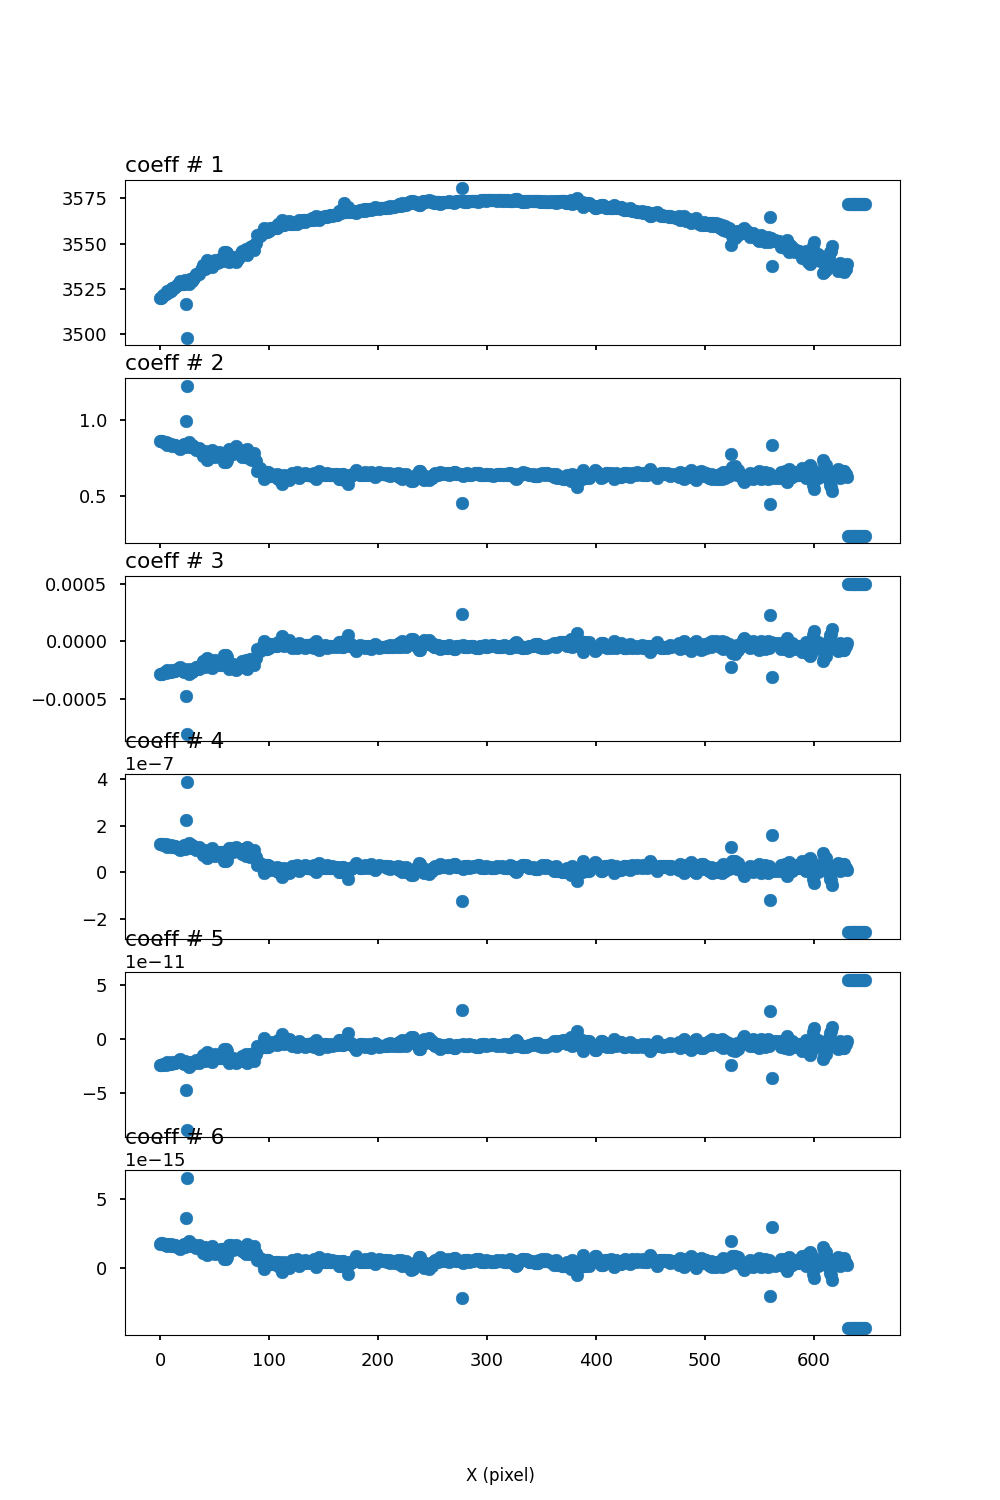

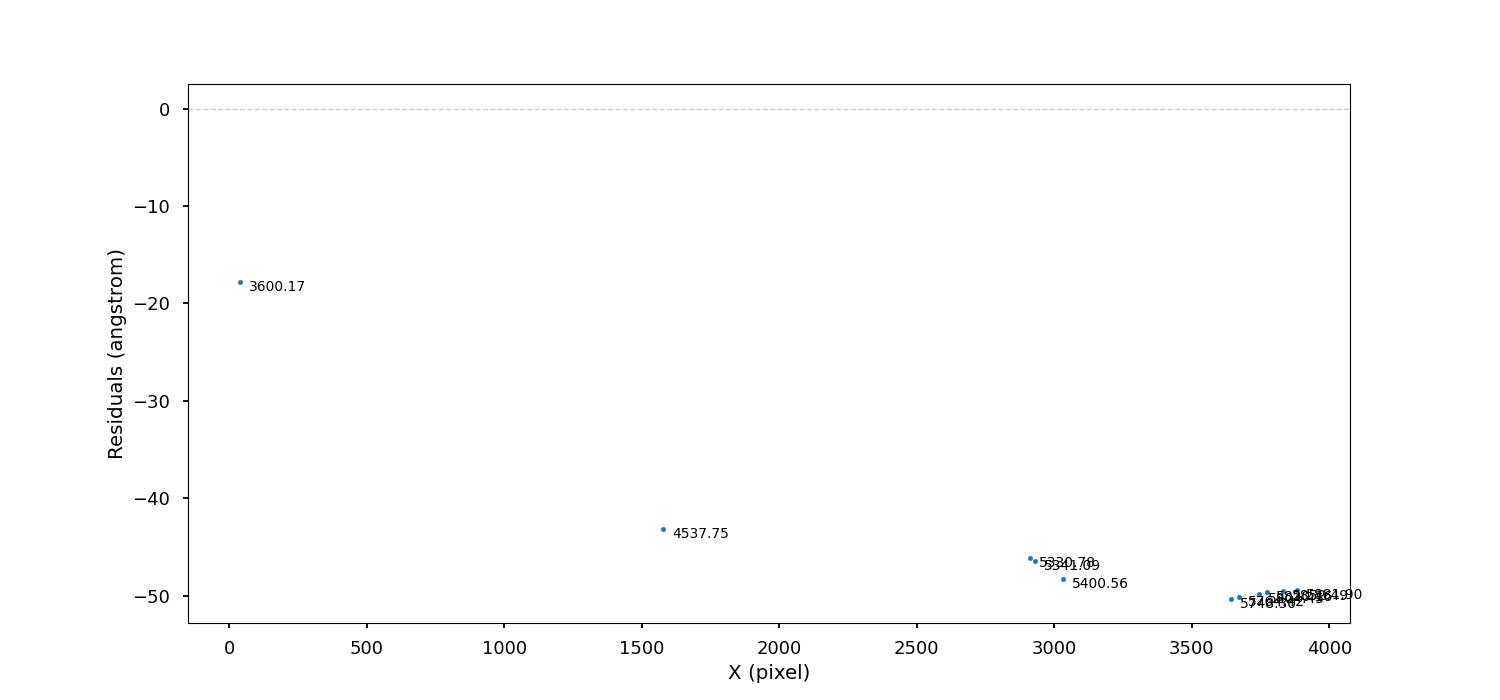

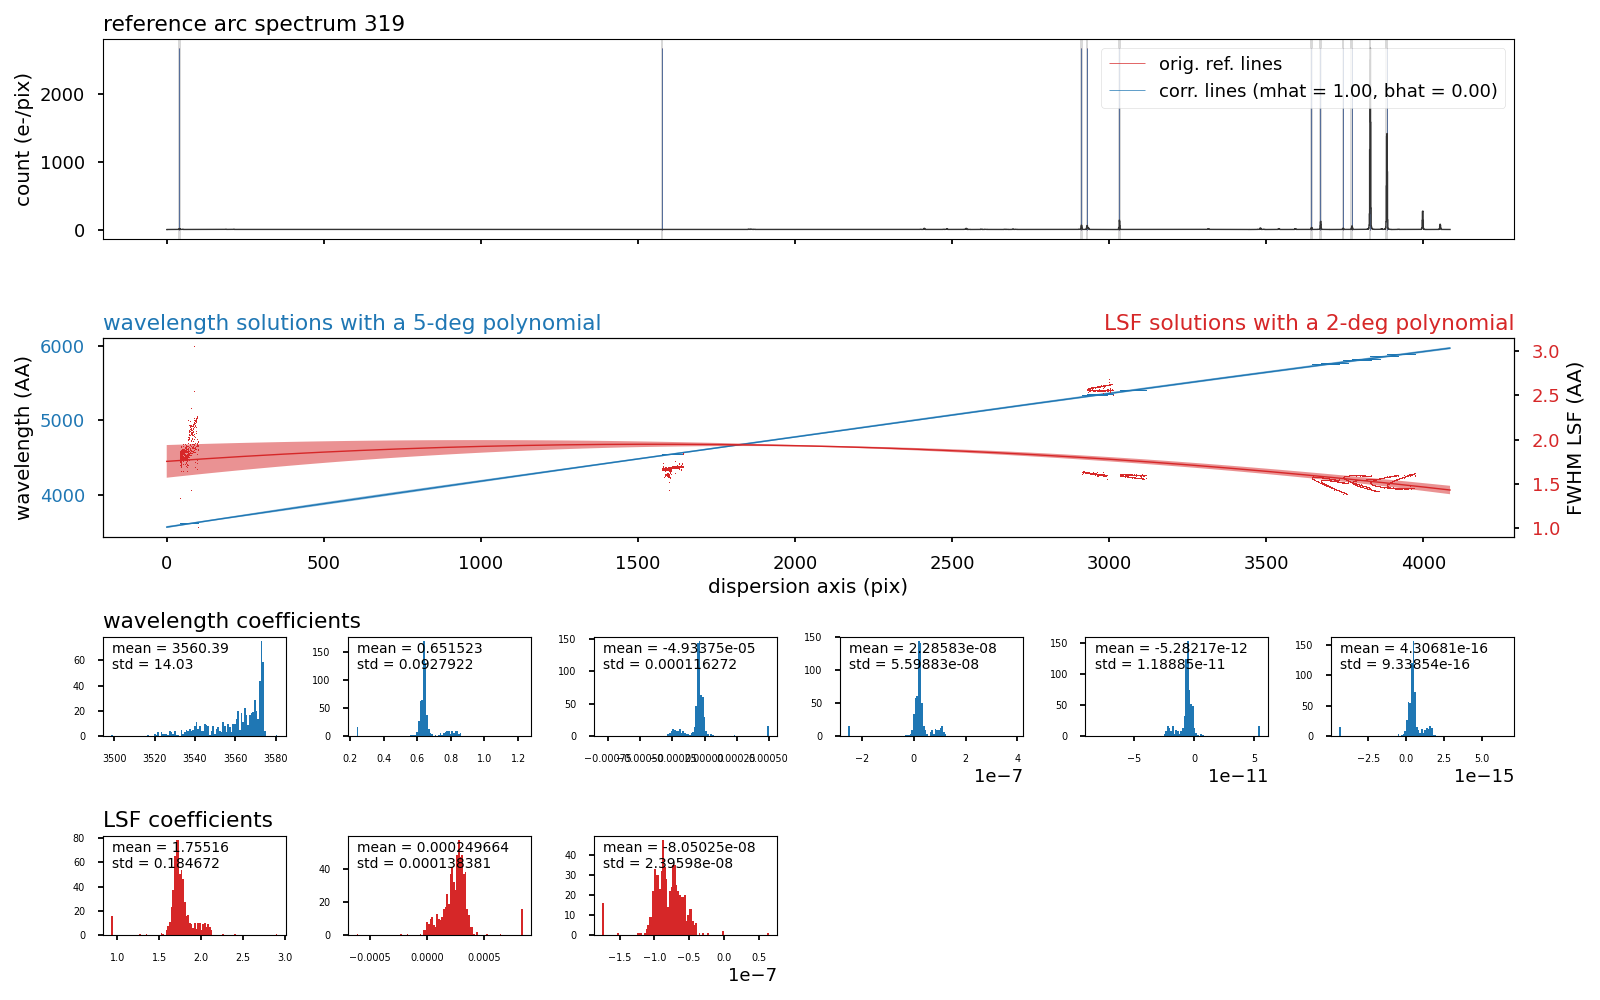

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-b1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-b1.fits'
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-b2.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'b2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_b2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 20 percentage masked  45 %
[INFO]: going to use 11 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_max =

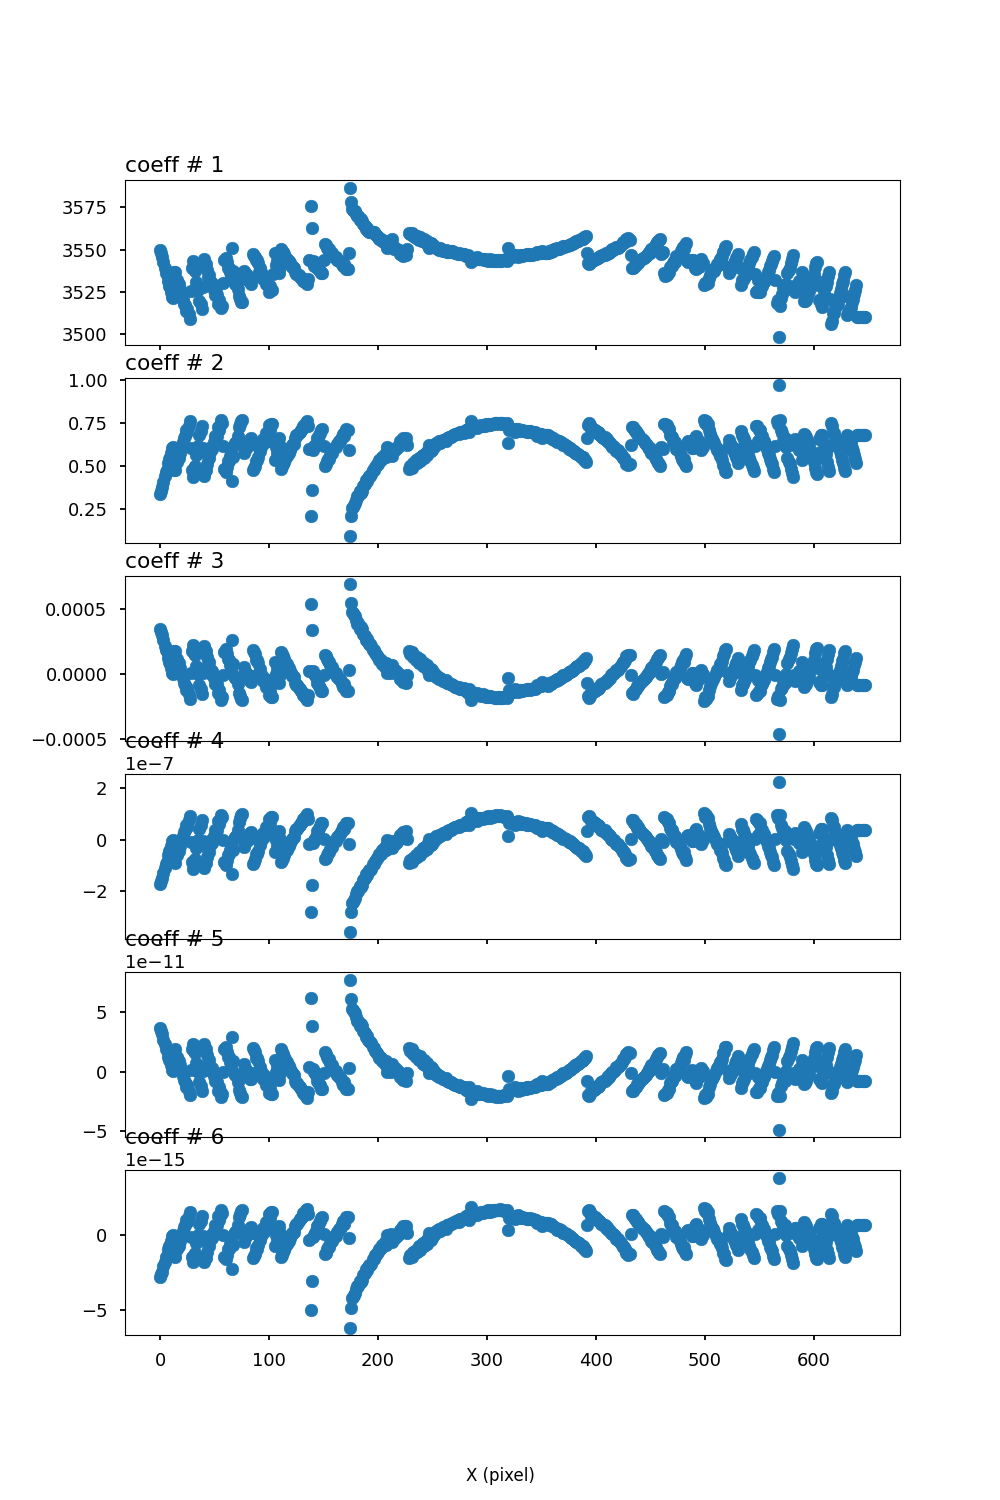

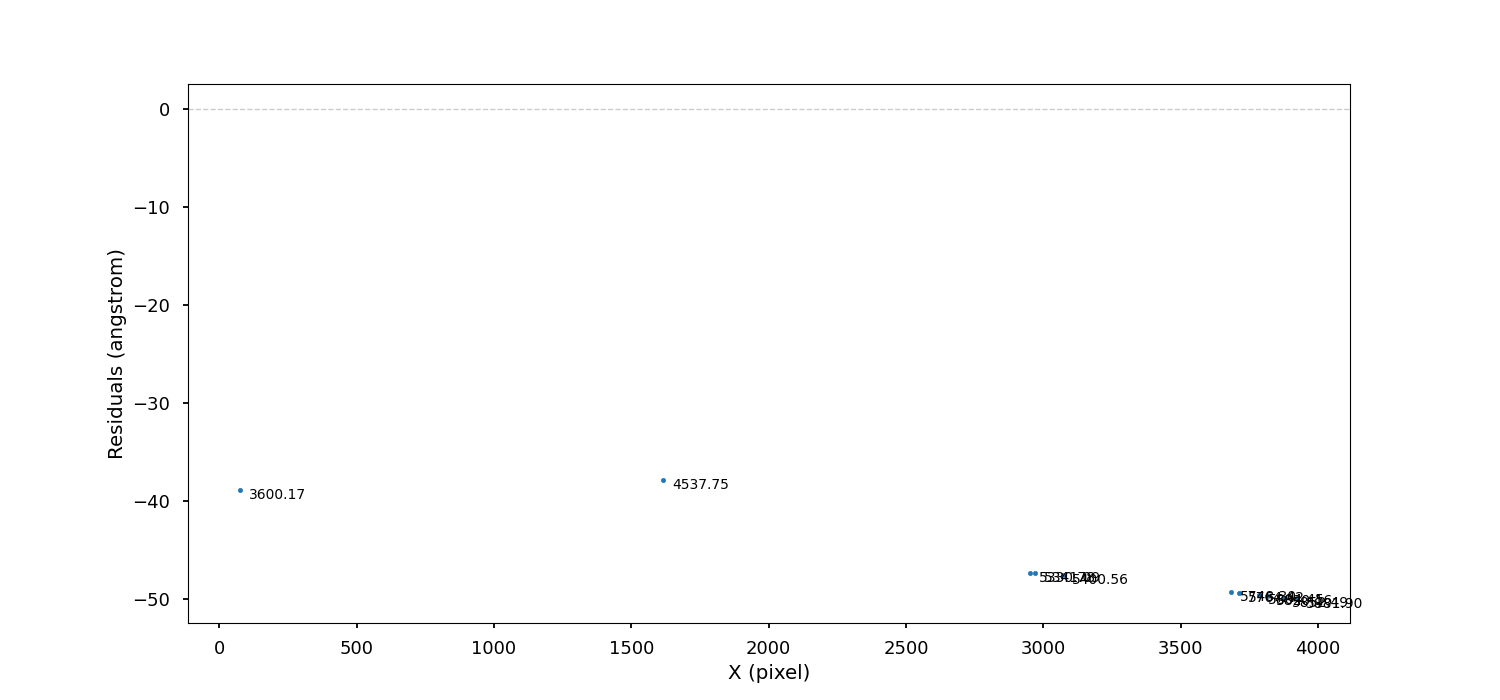

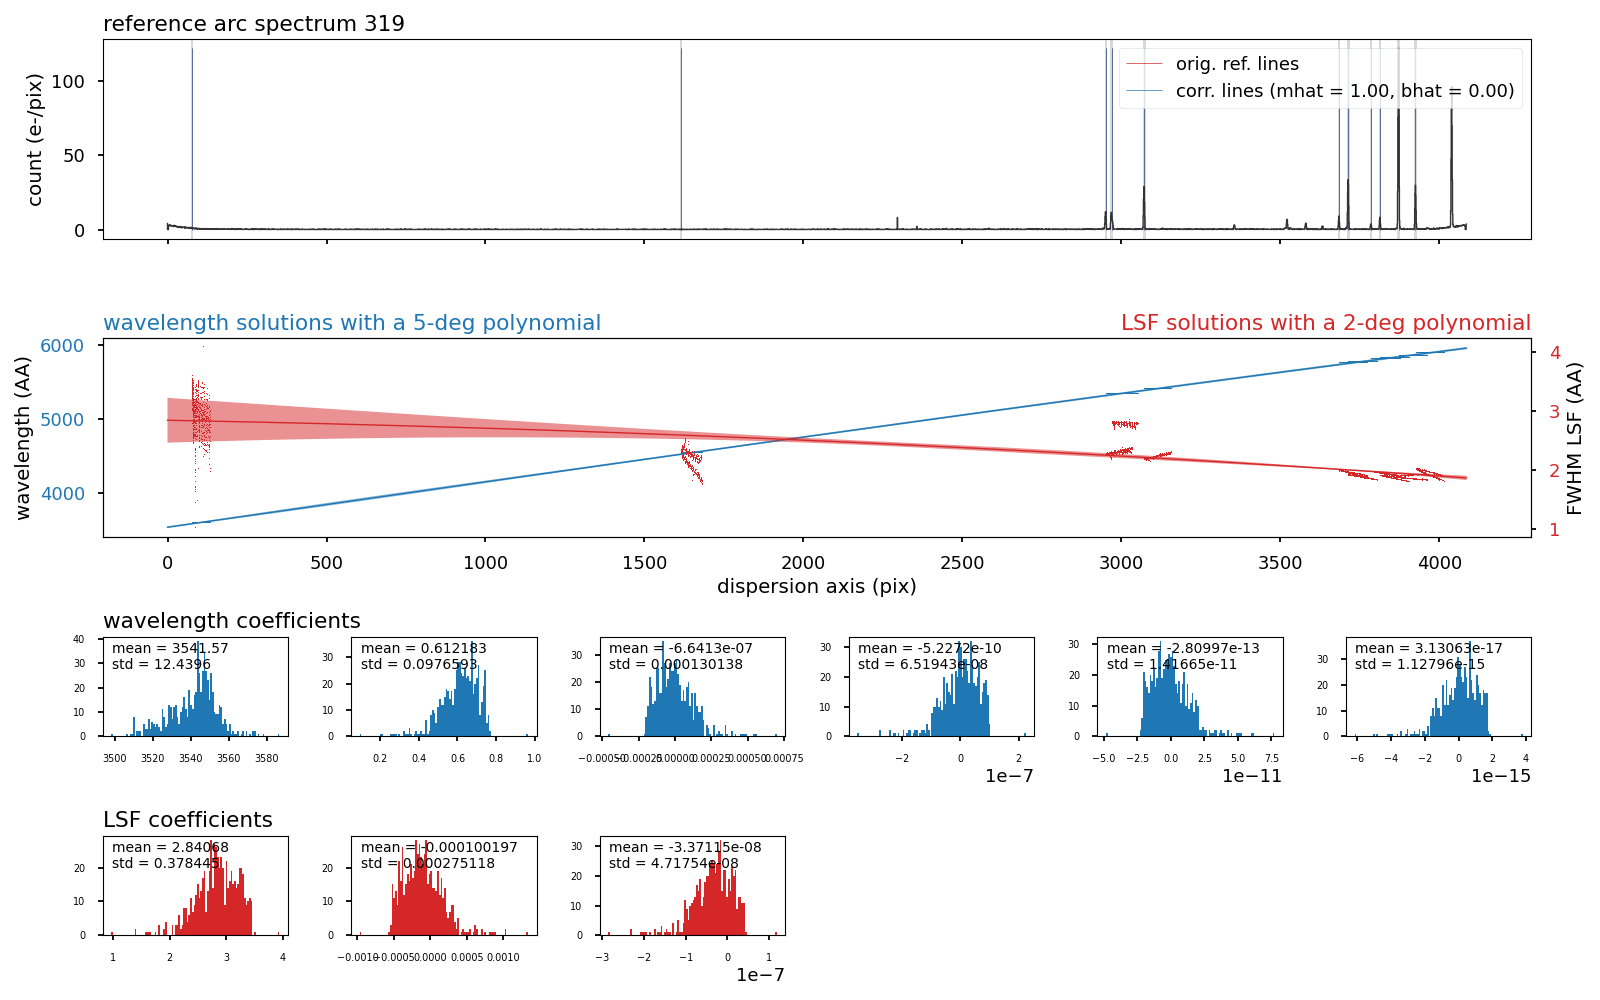

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-b2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-b2.fits'
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-b3.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'b3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_b3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 20 percentage masked  45 %
[INFO]: going to use 11 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_max =

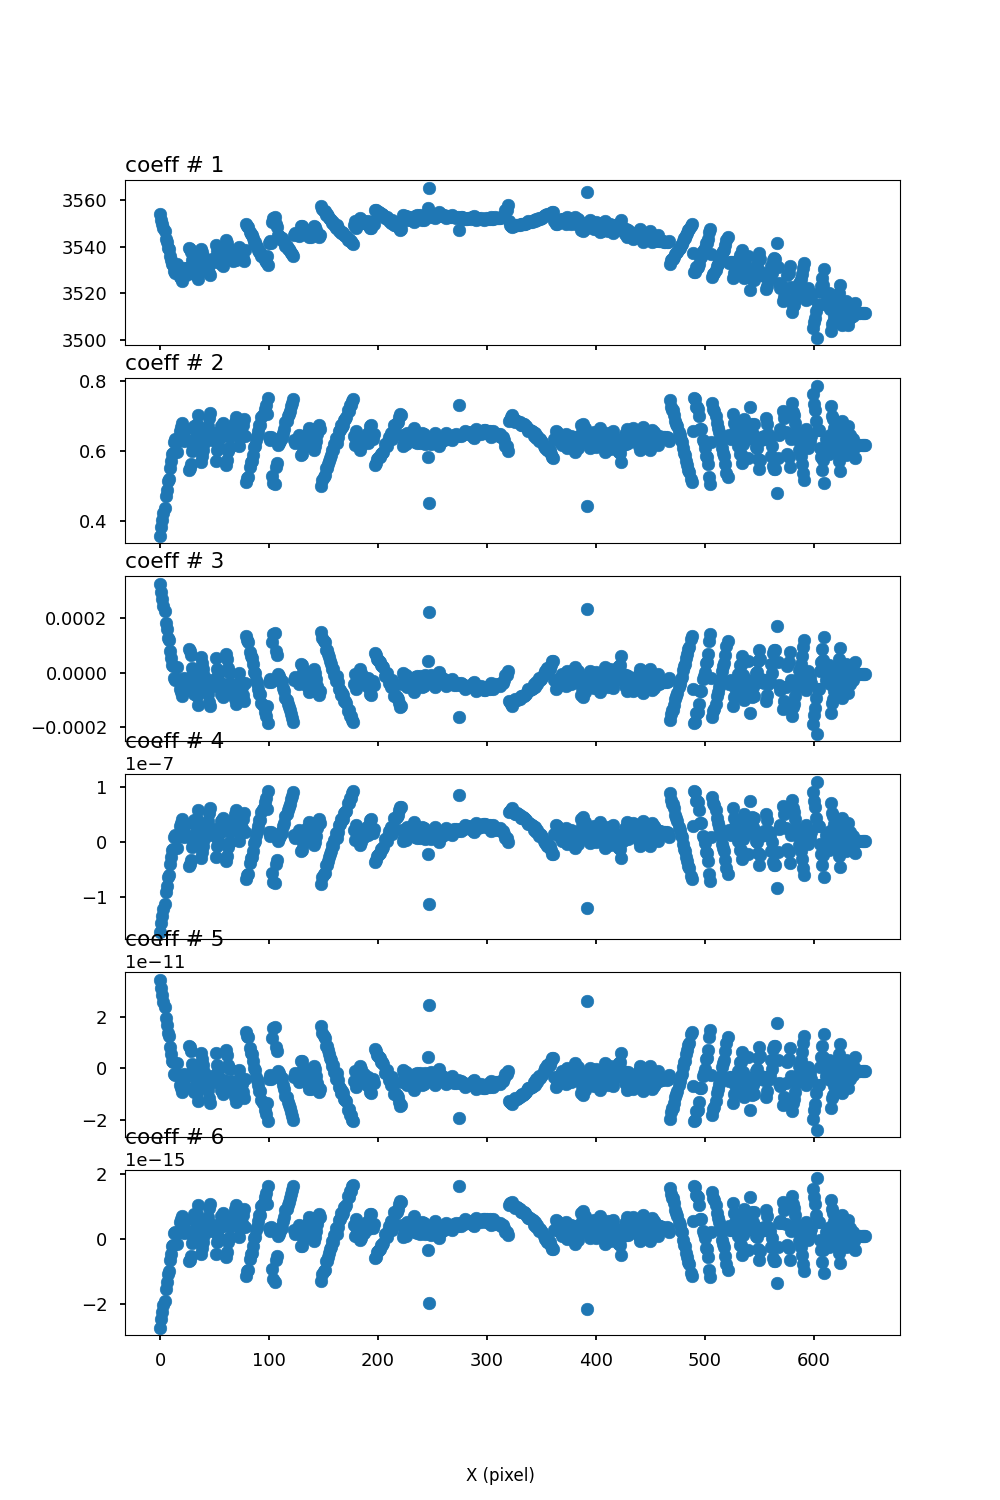

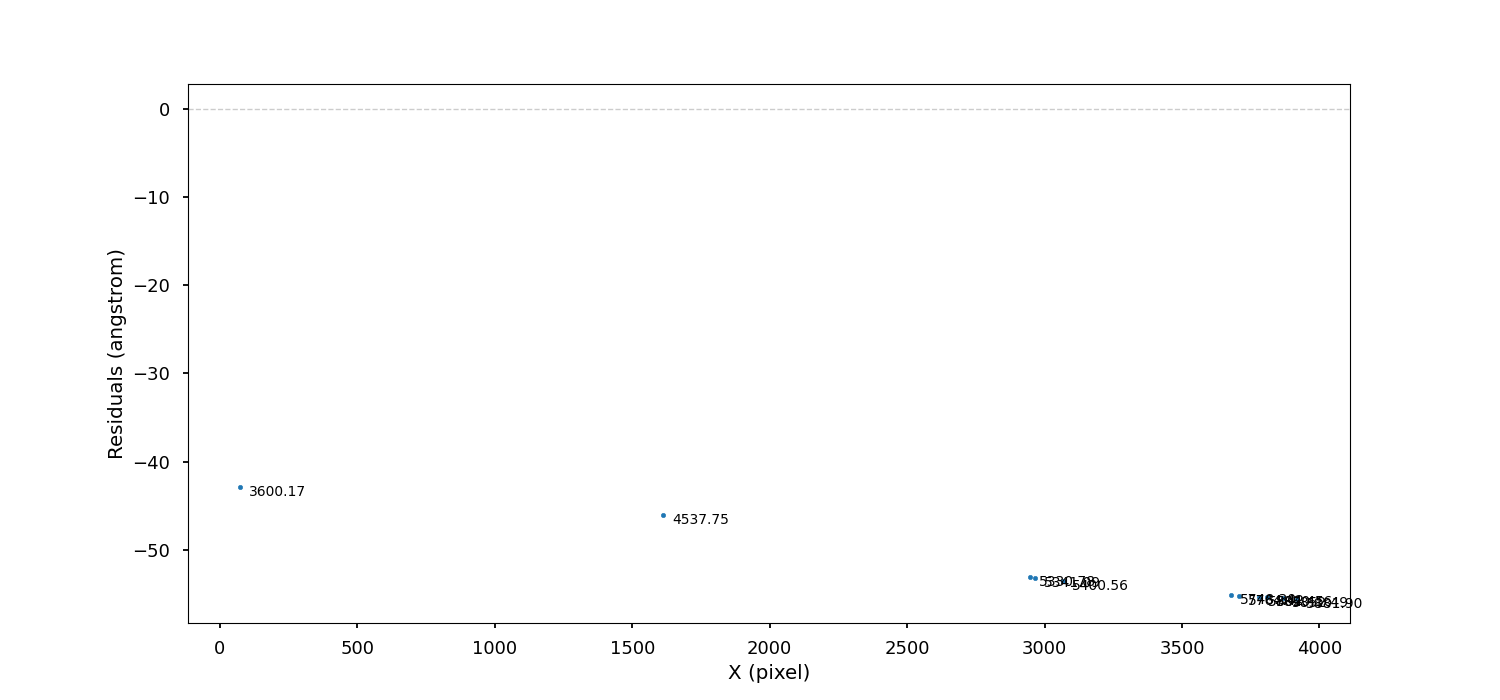

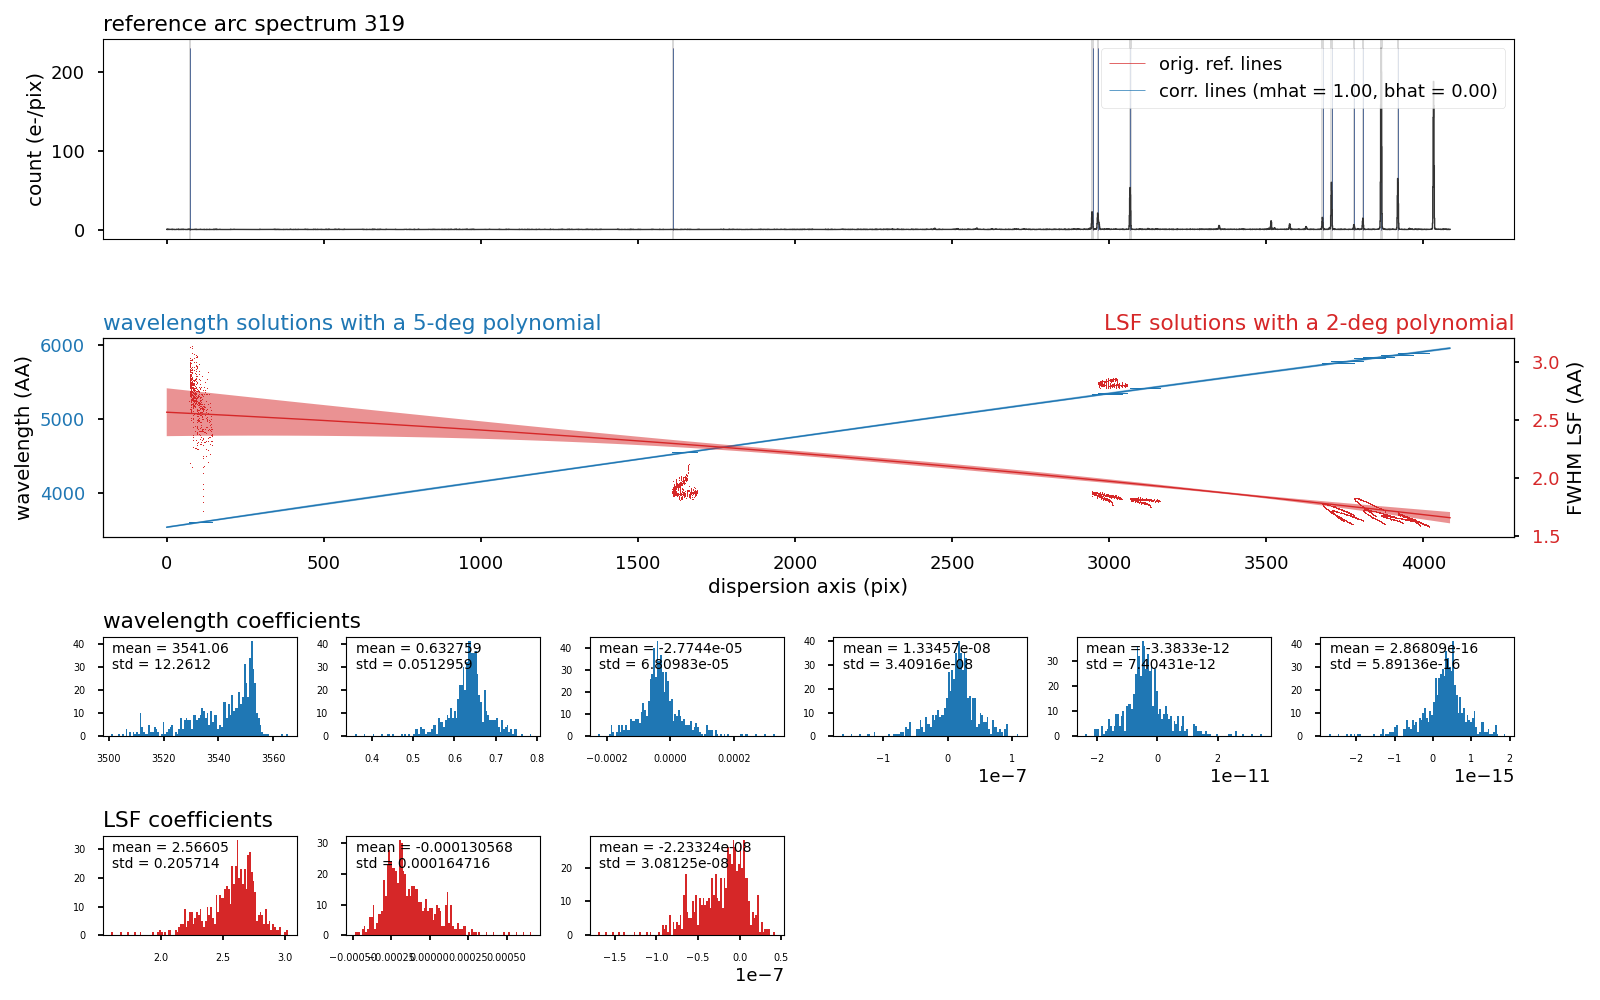

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-b3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-b3.fits'
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-r1.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 33 percentage masked  54.5455 %
[INFO]: going to use 15 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_

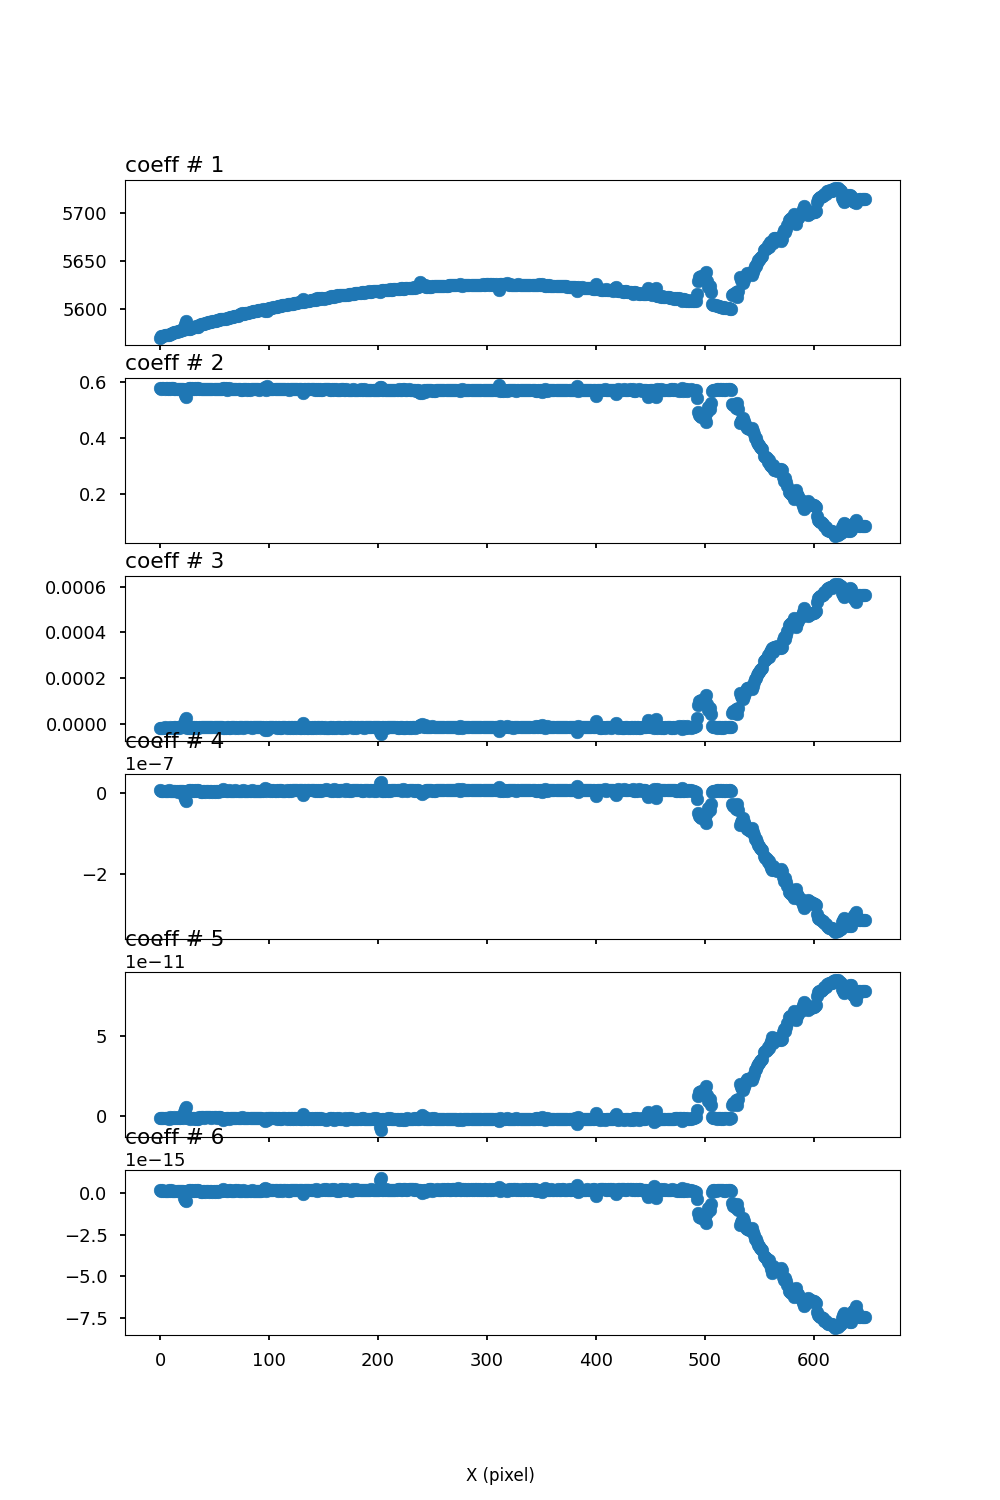

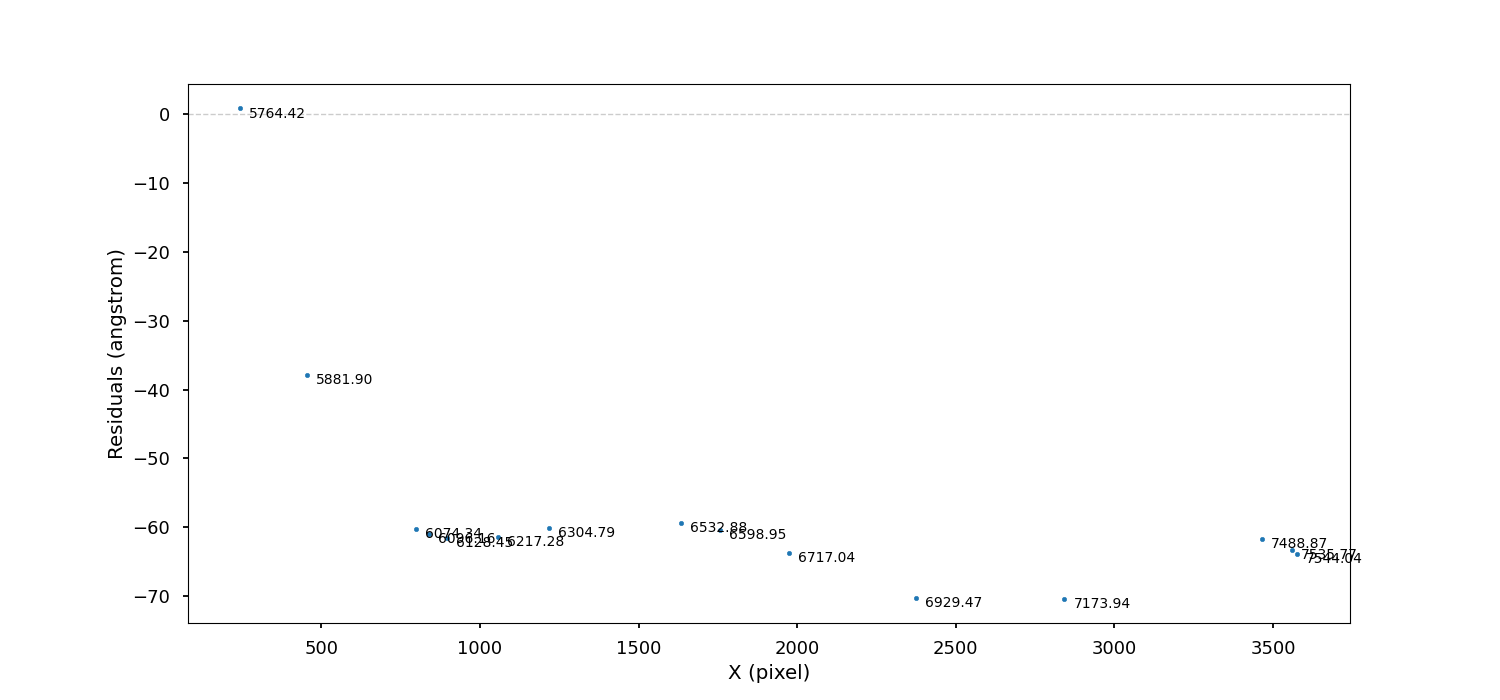

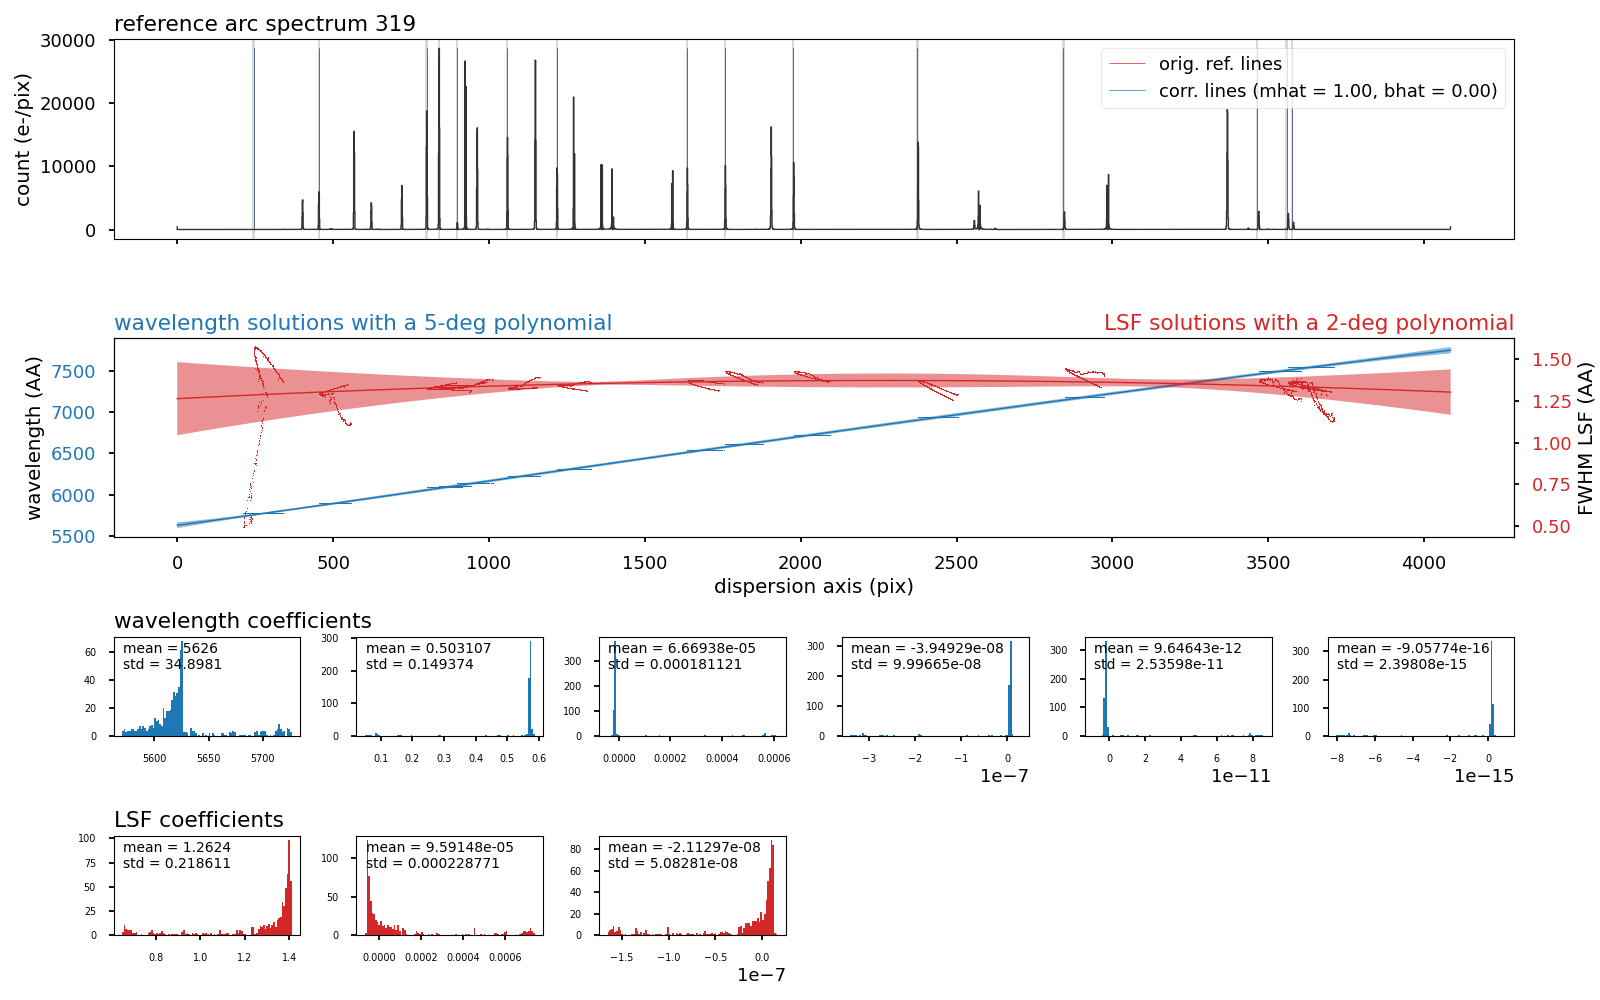

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-r1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-r1.fits'
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-r2.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 33 percentage masked  54.5455 %
[INFO]: going to use 15 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_

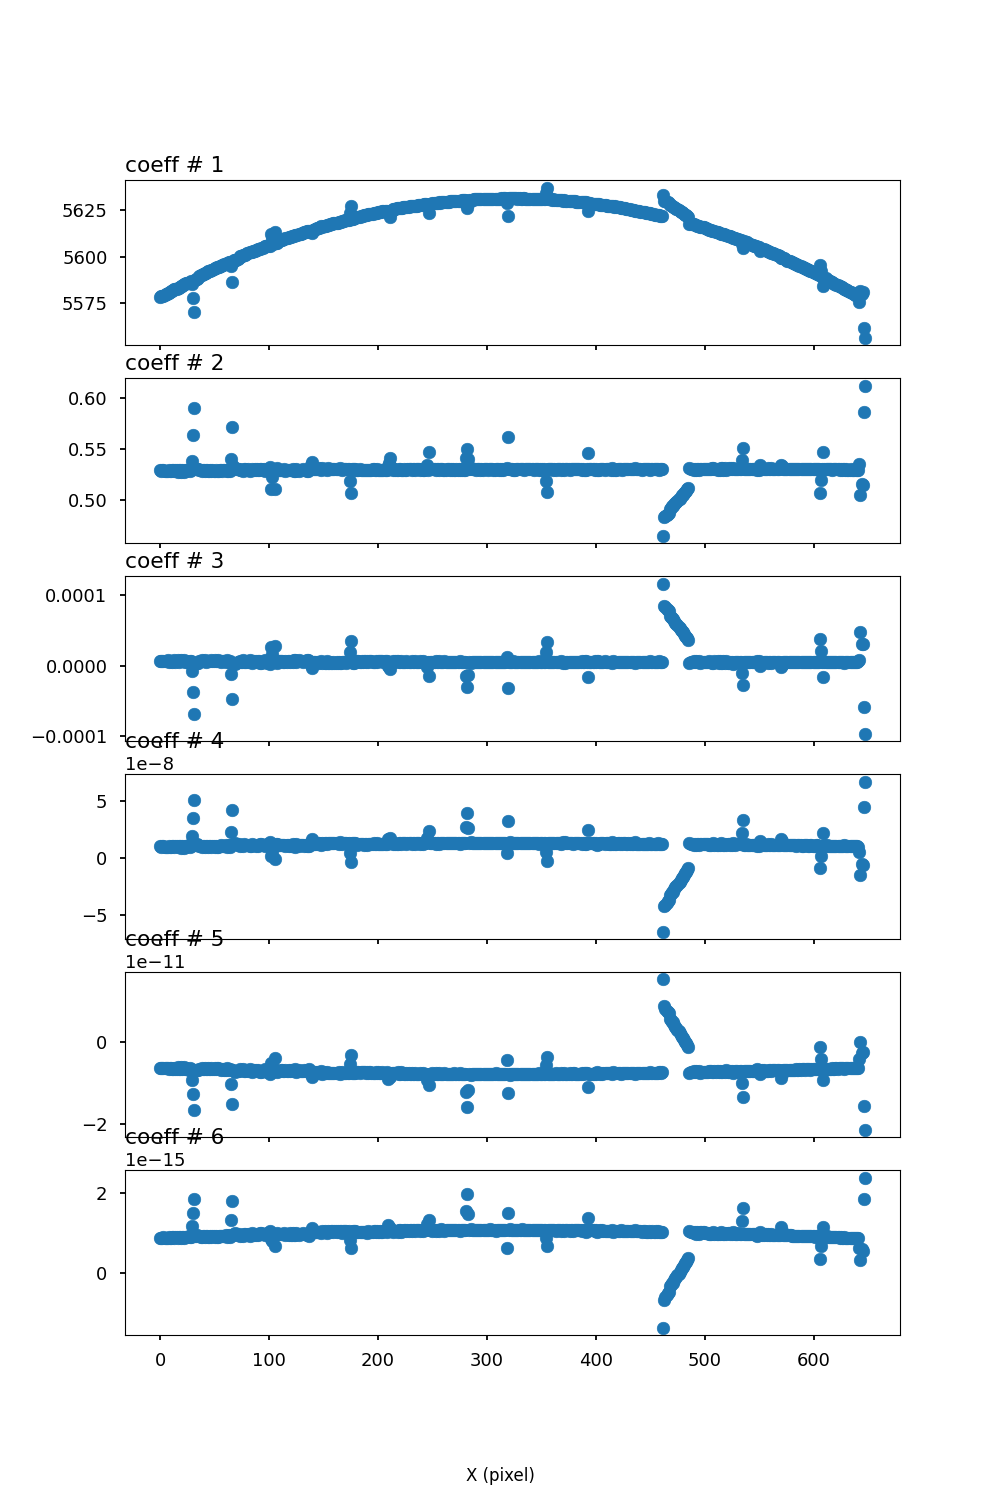

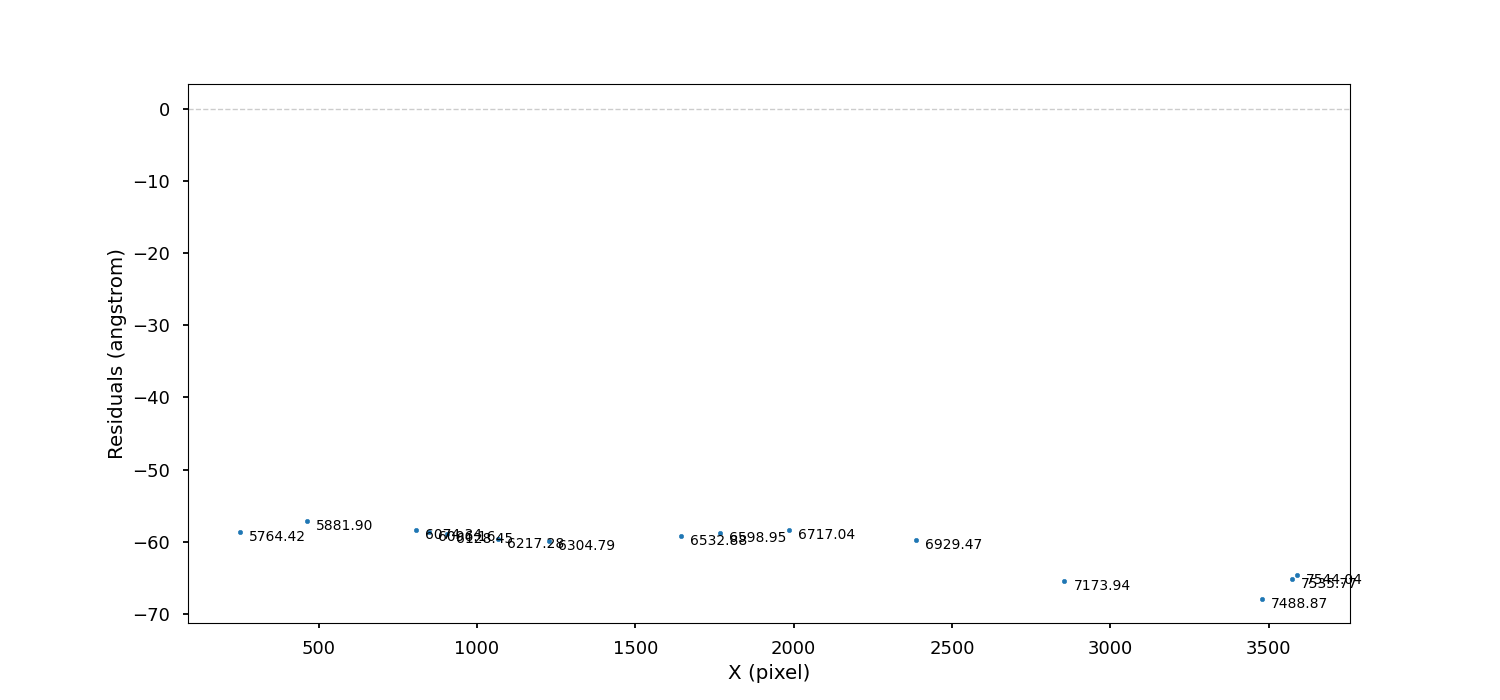

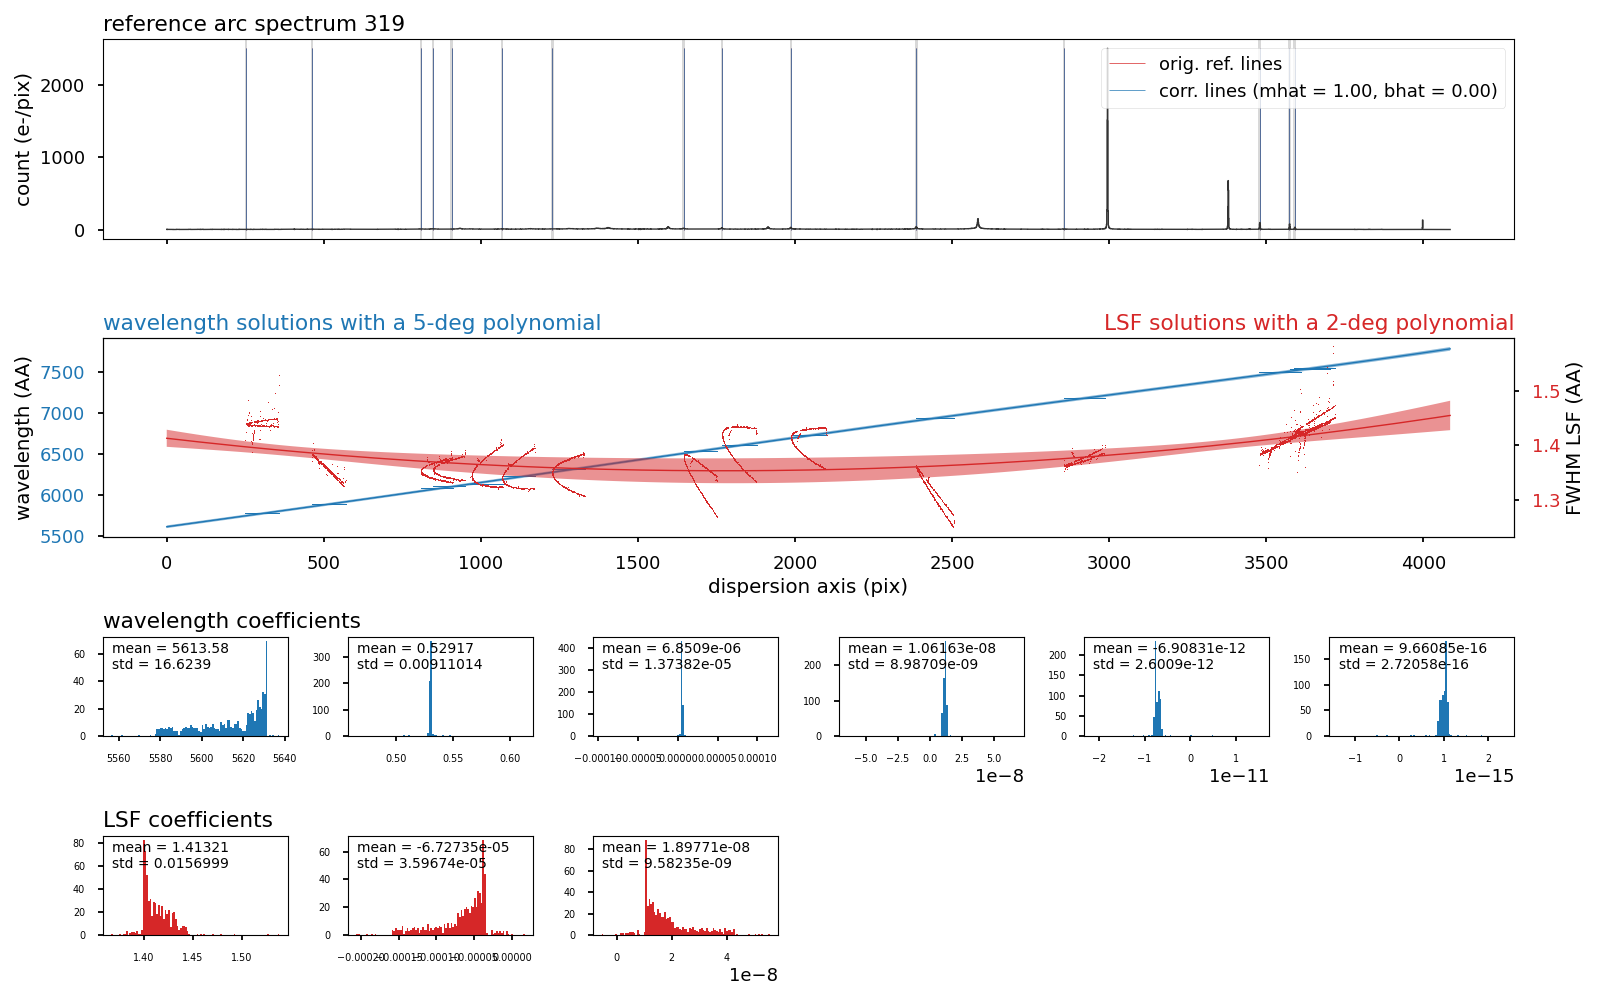

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-r2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-r2.fits'
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-r3.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 33 percentage masked  54.5455 %
[INFO]: going to use 15 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_

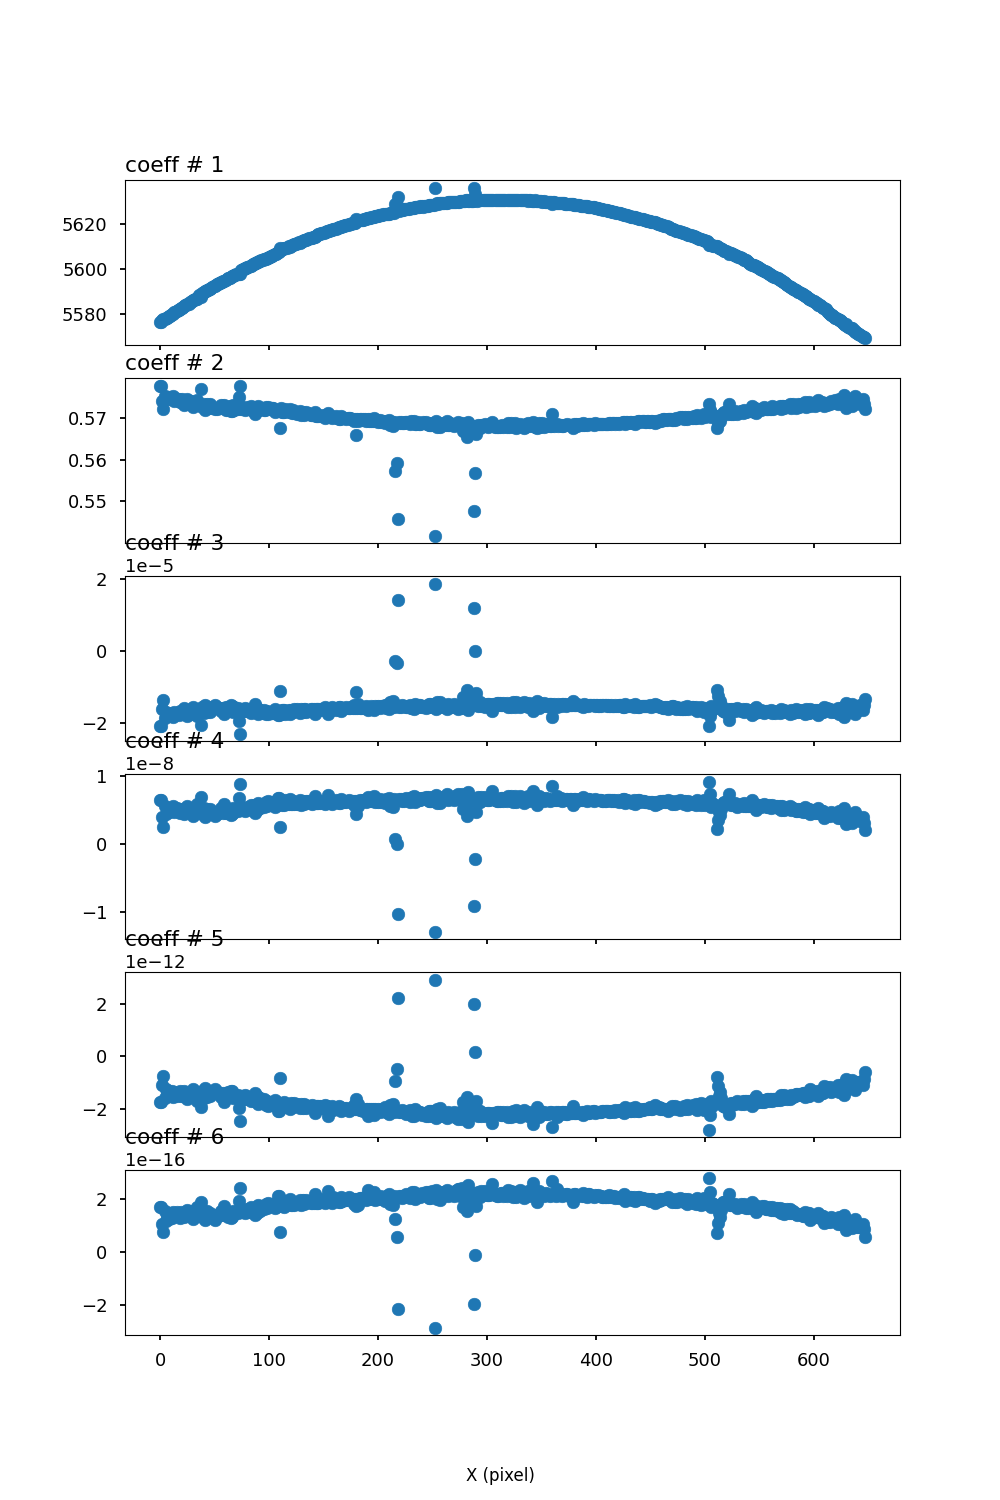

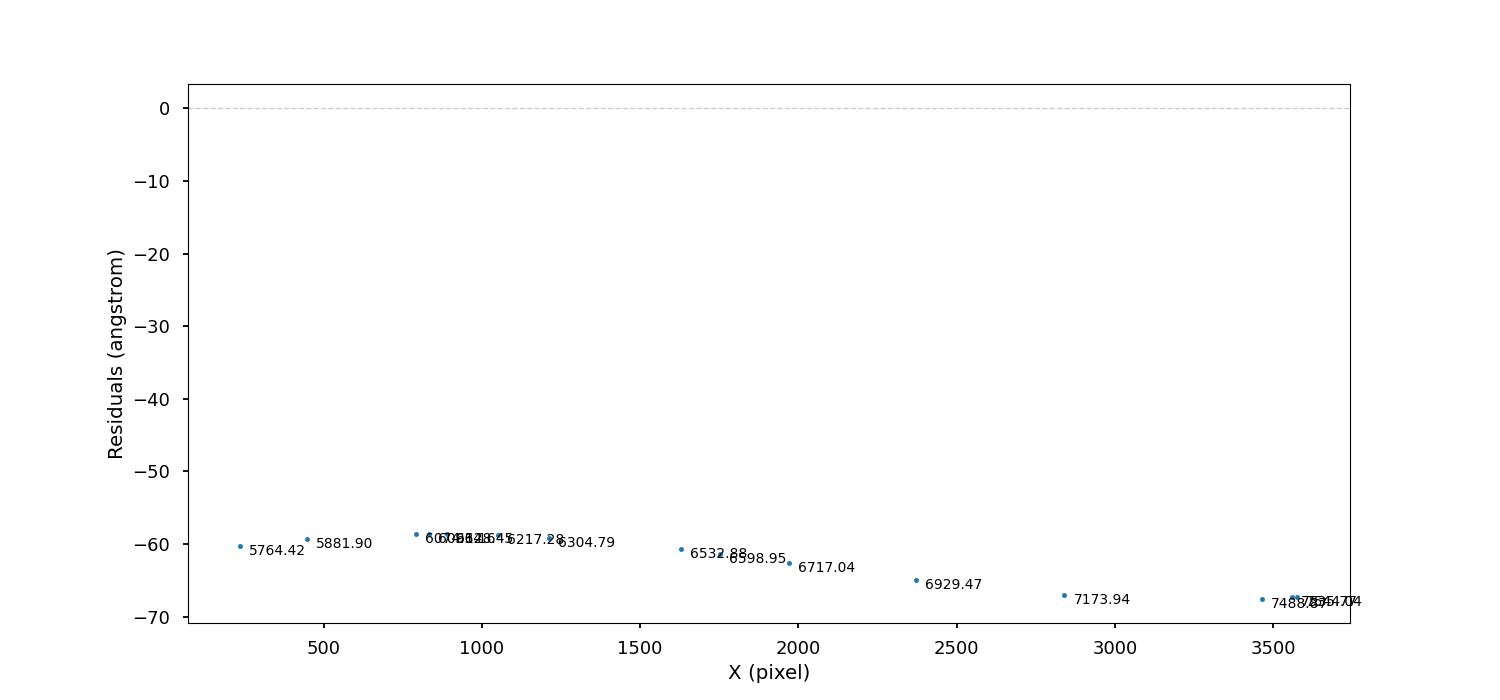

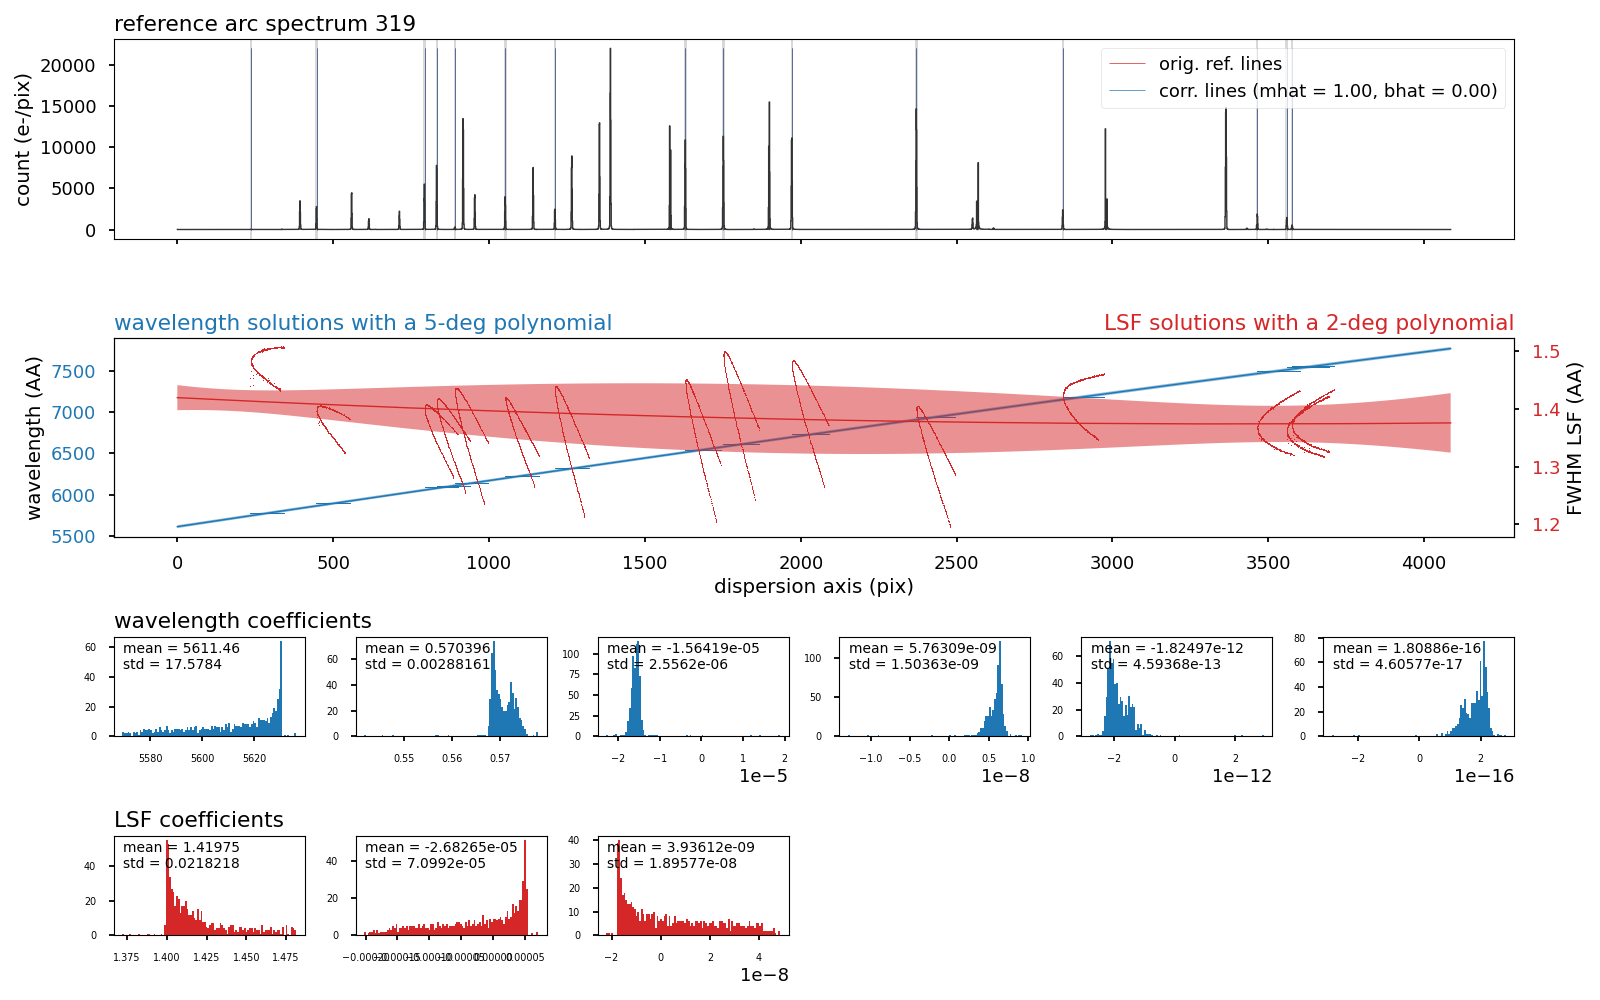

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-r3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-r3.fits'
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-z1.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  48.3871 %
[INFO]: going to use 16 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_

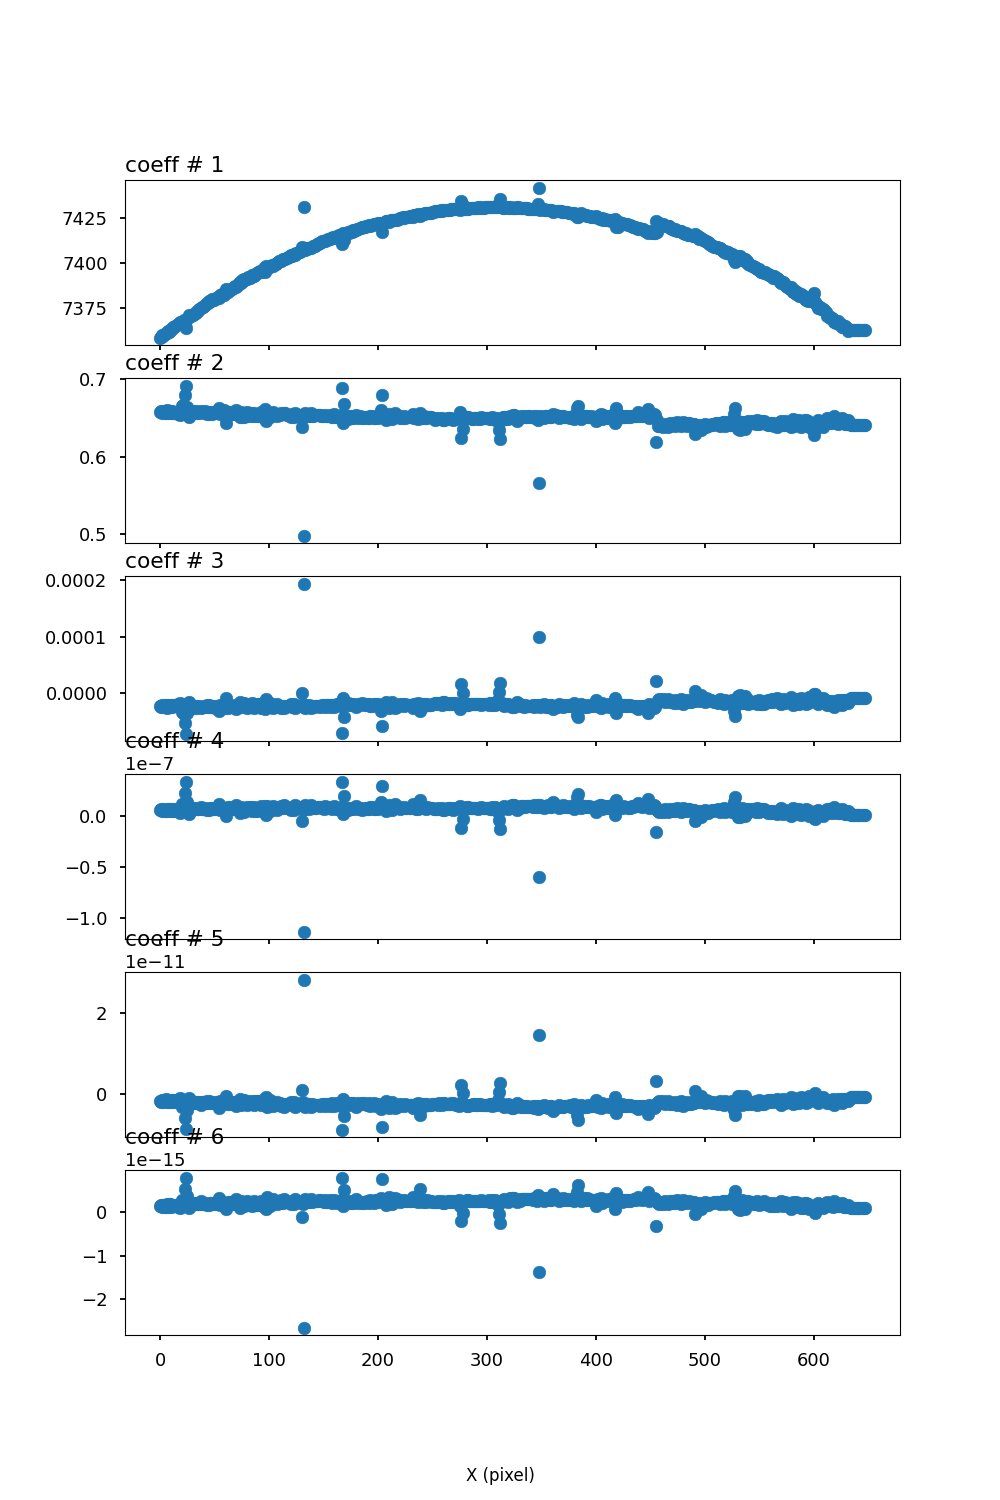

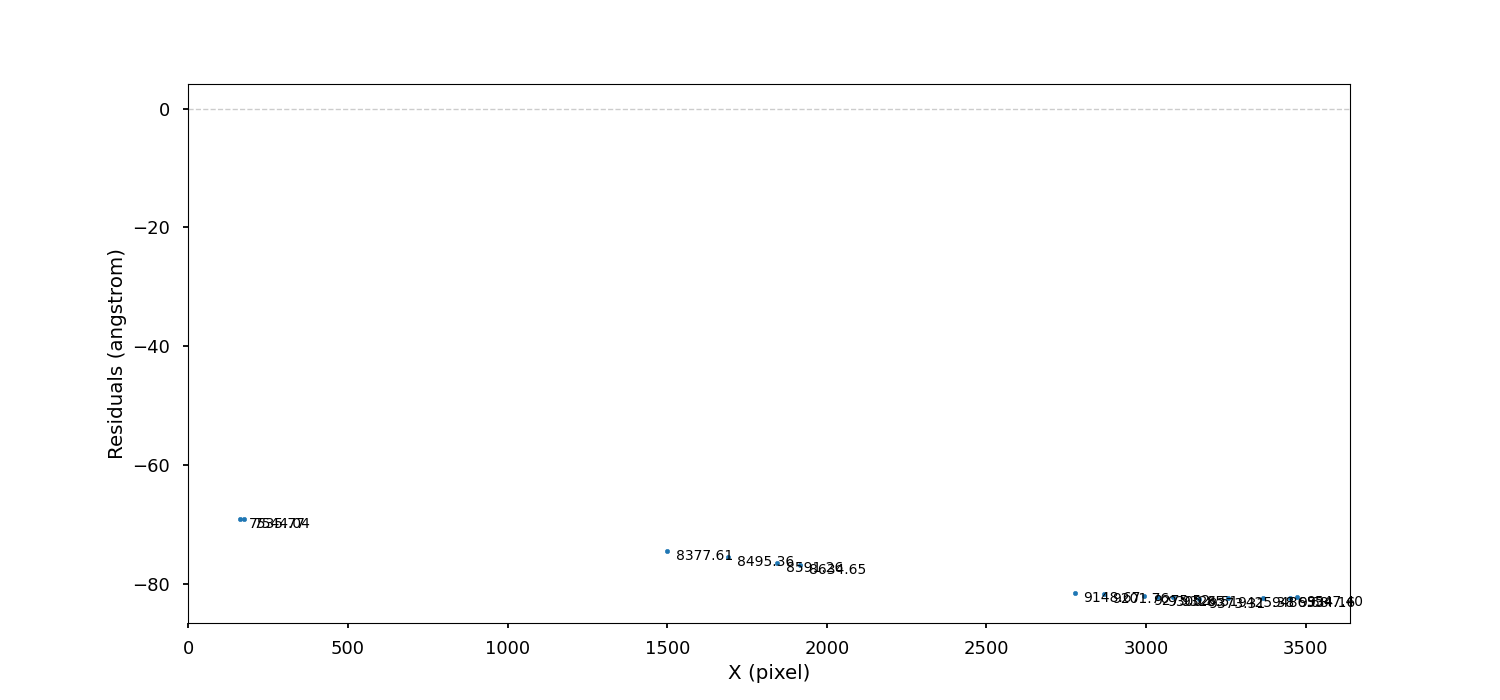

[WARNING]: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`. (RuntimeWarning)


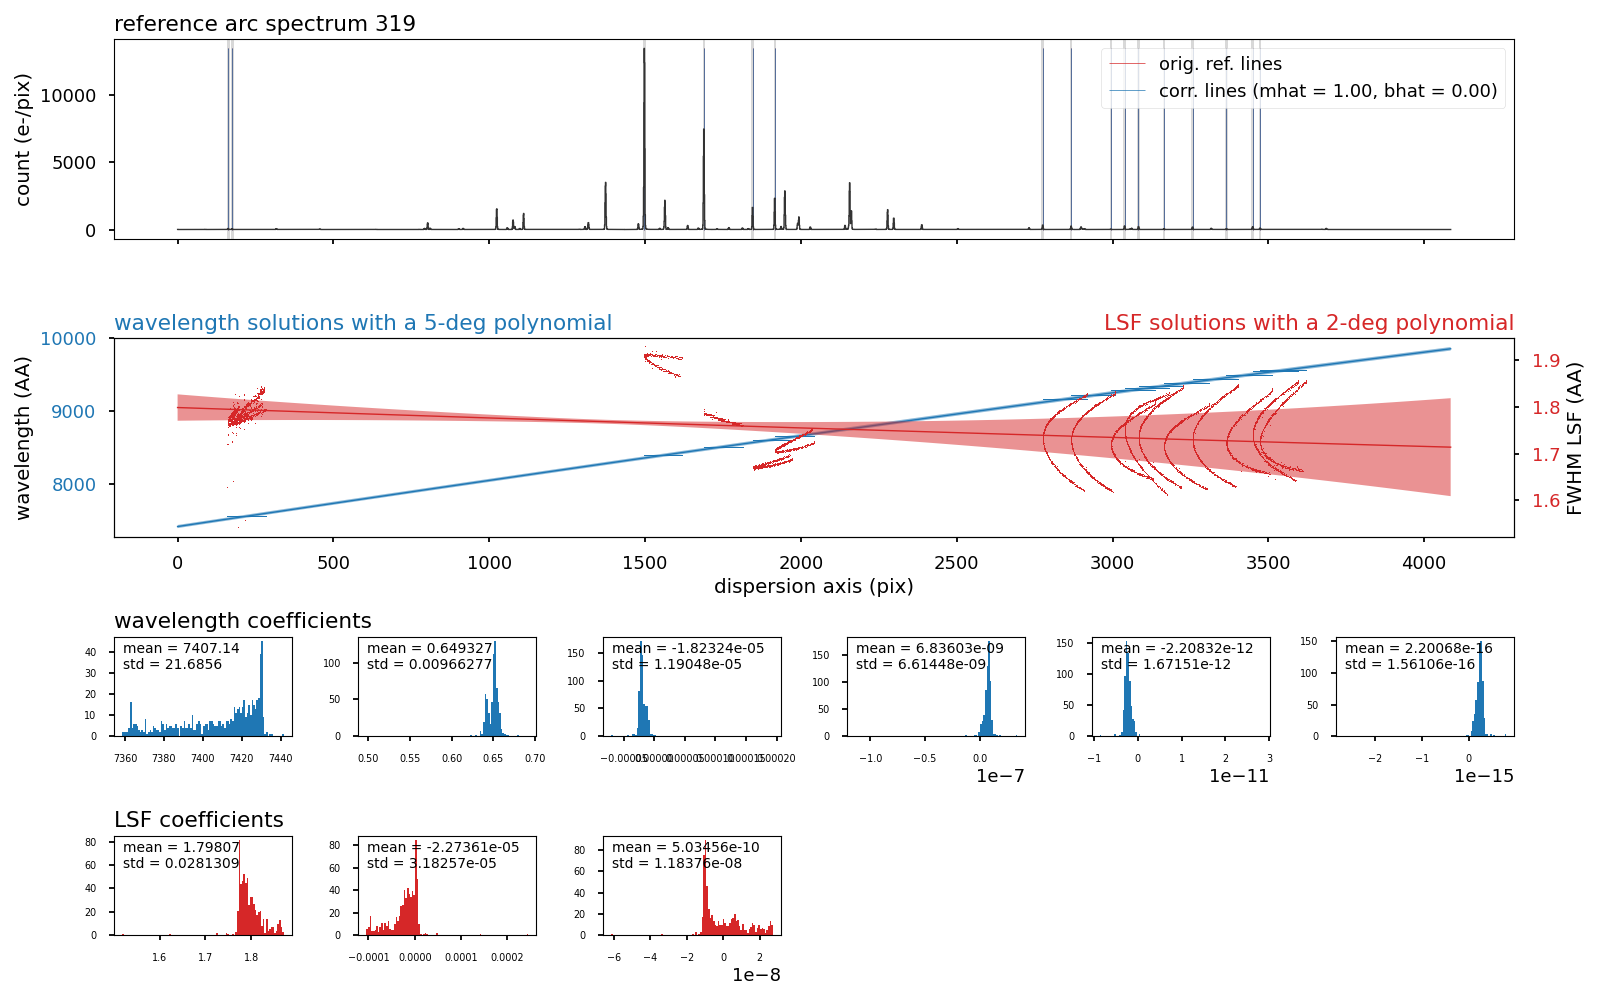

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-z1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-z1.fits'
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-z2.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  48.3871 %
[INFO]: going to use 16 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_

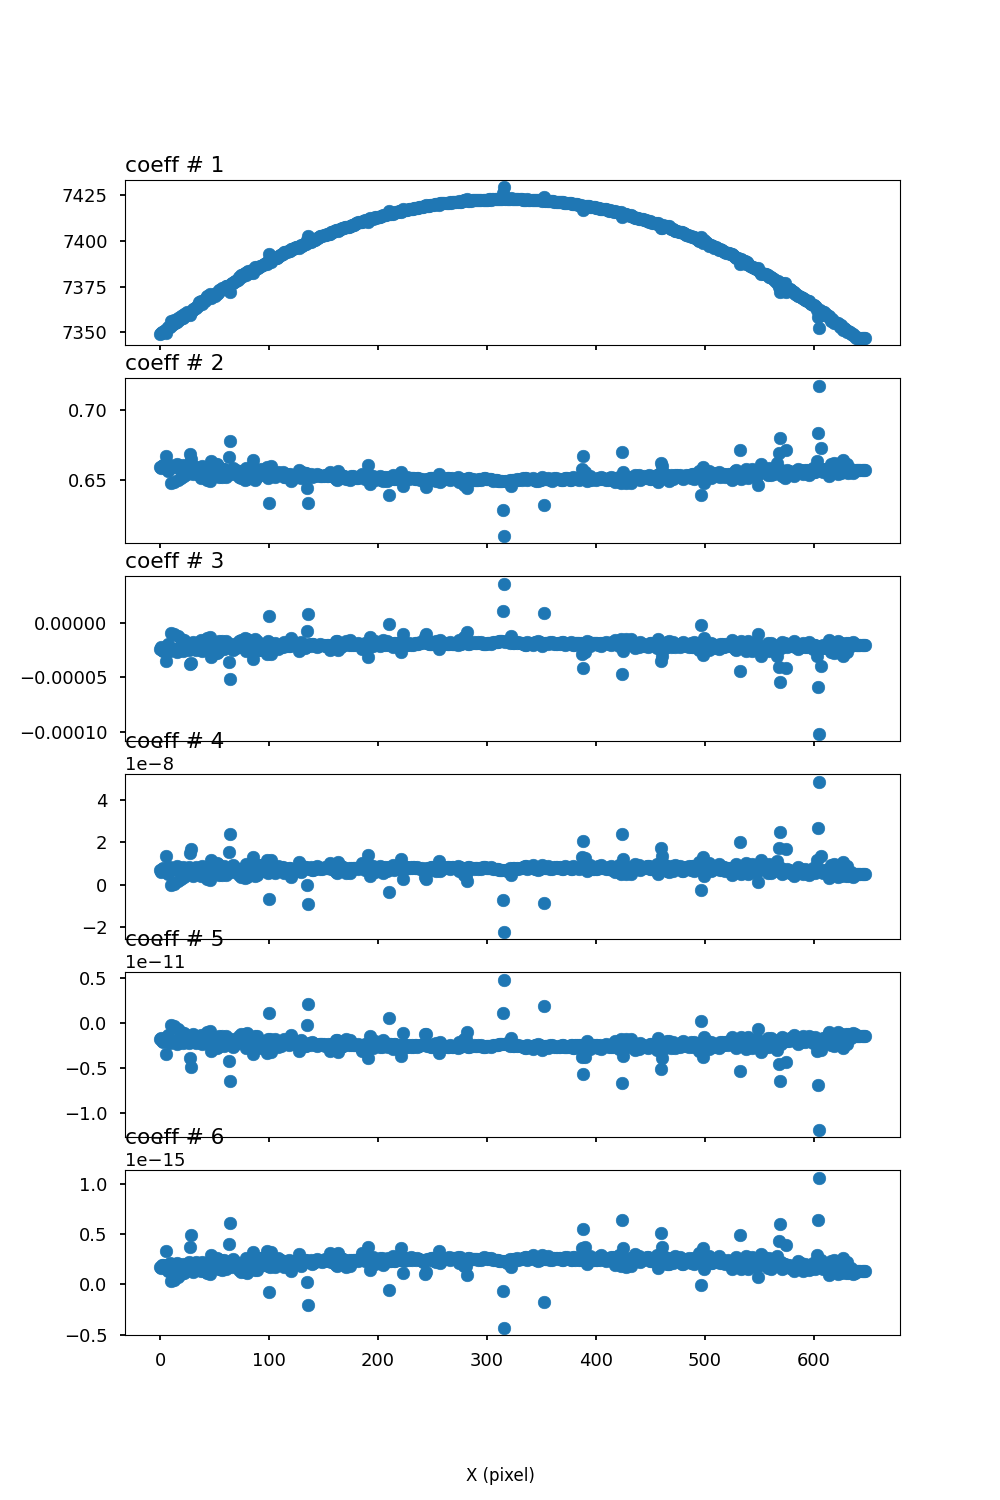

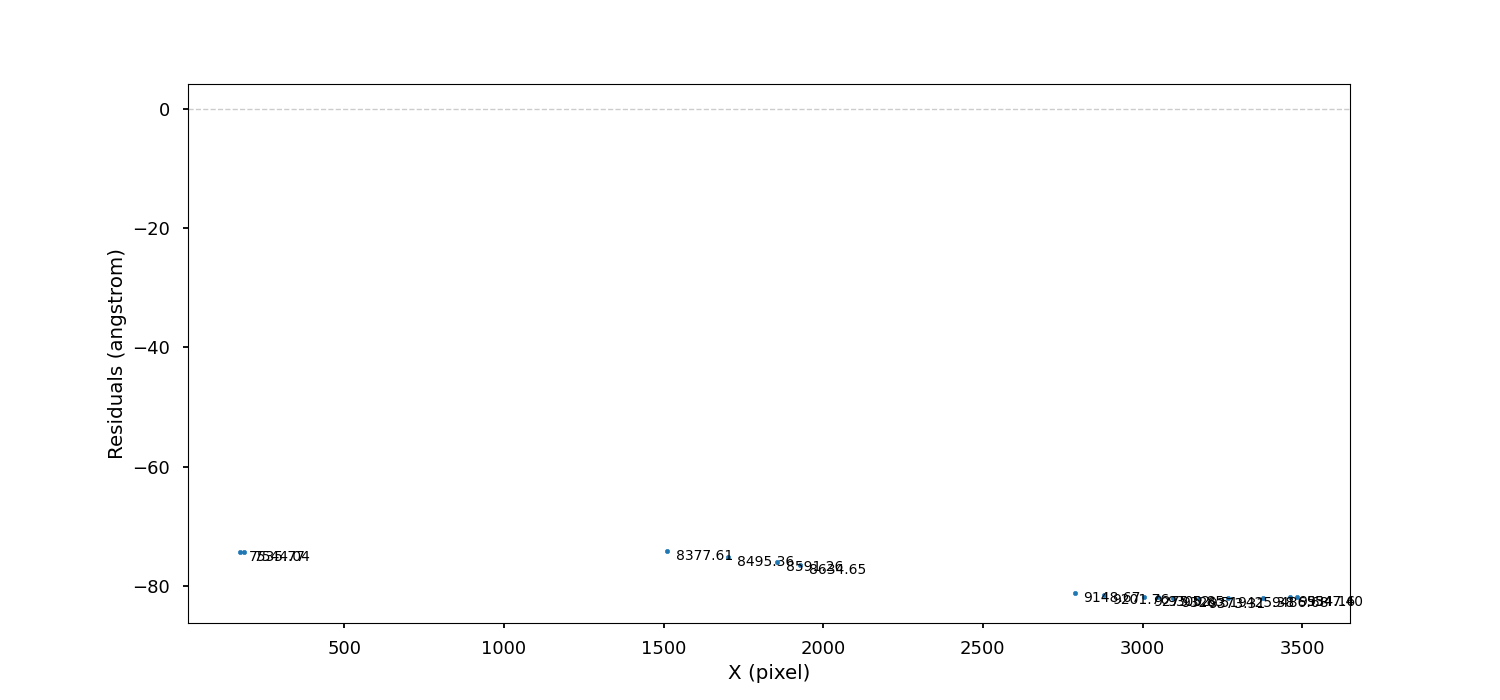

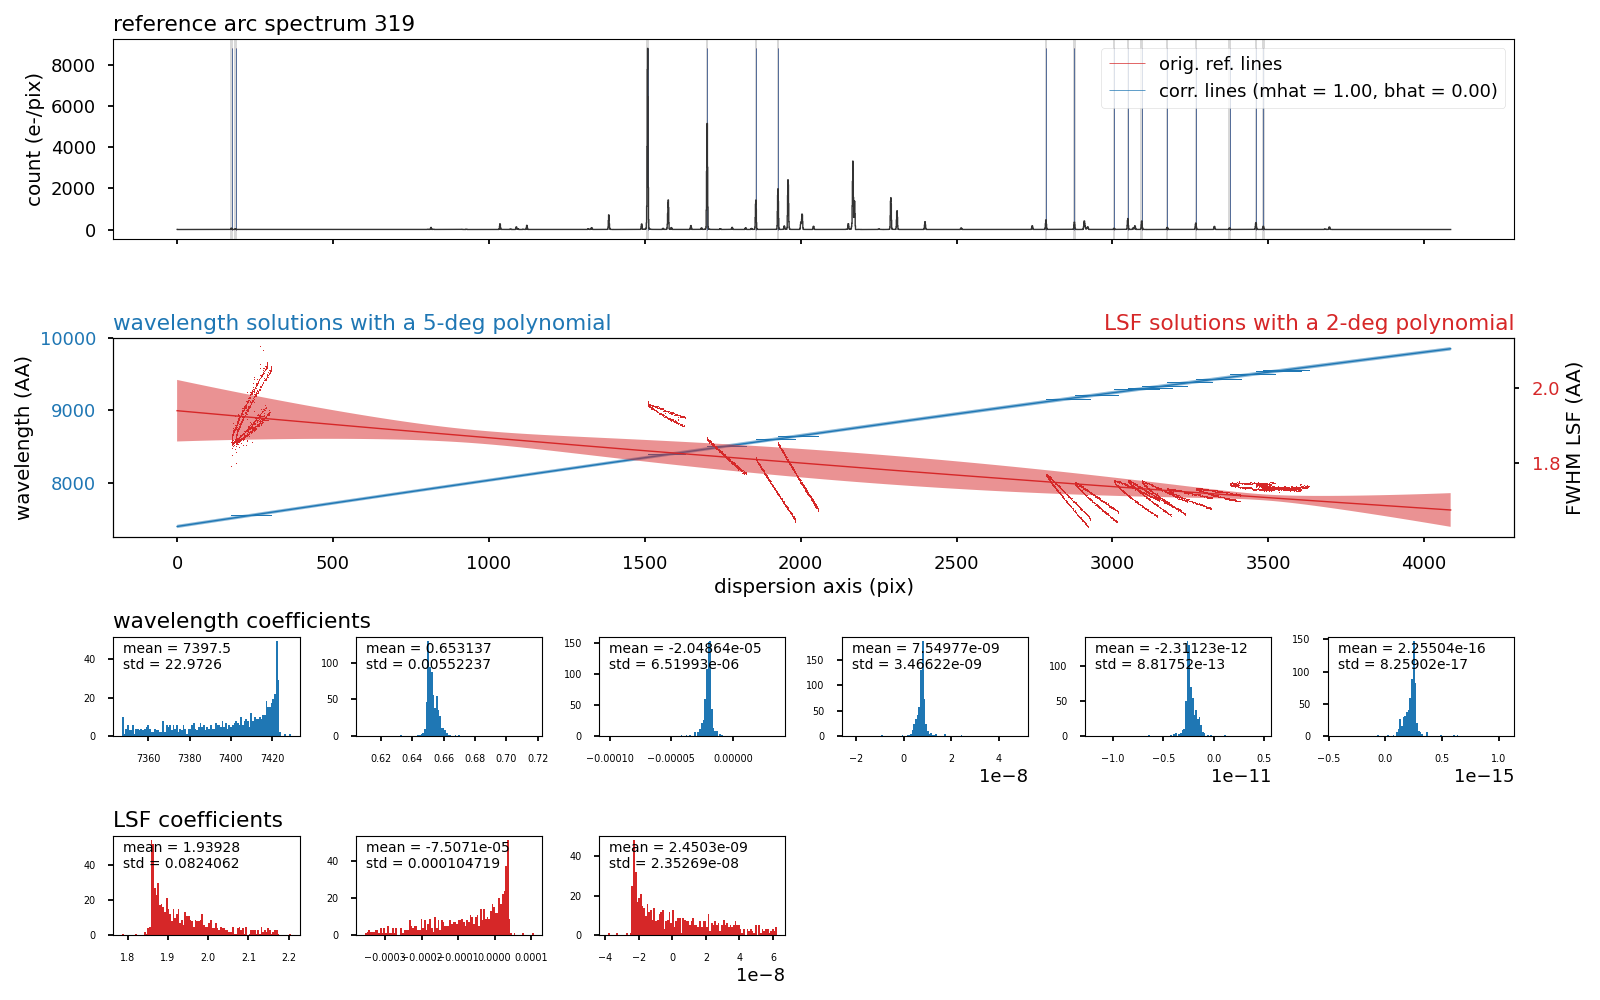

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-z2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-z2.fits'
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-xmarc_neon-z3.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  48.3871 %
[INFO]: going to use 16 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_

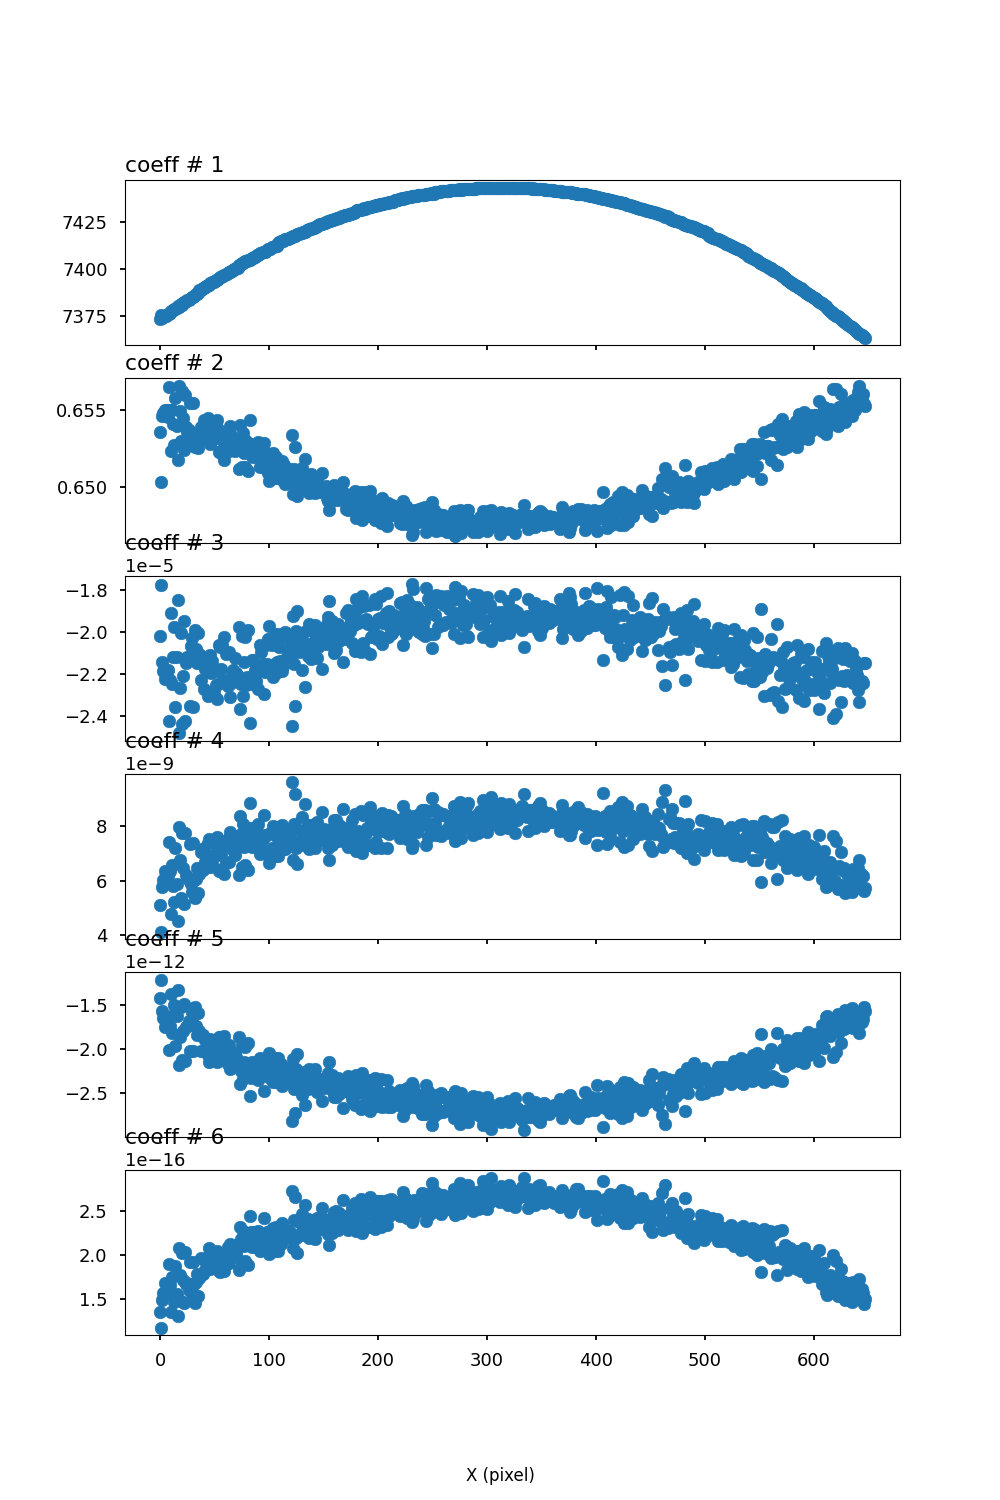

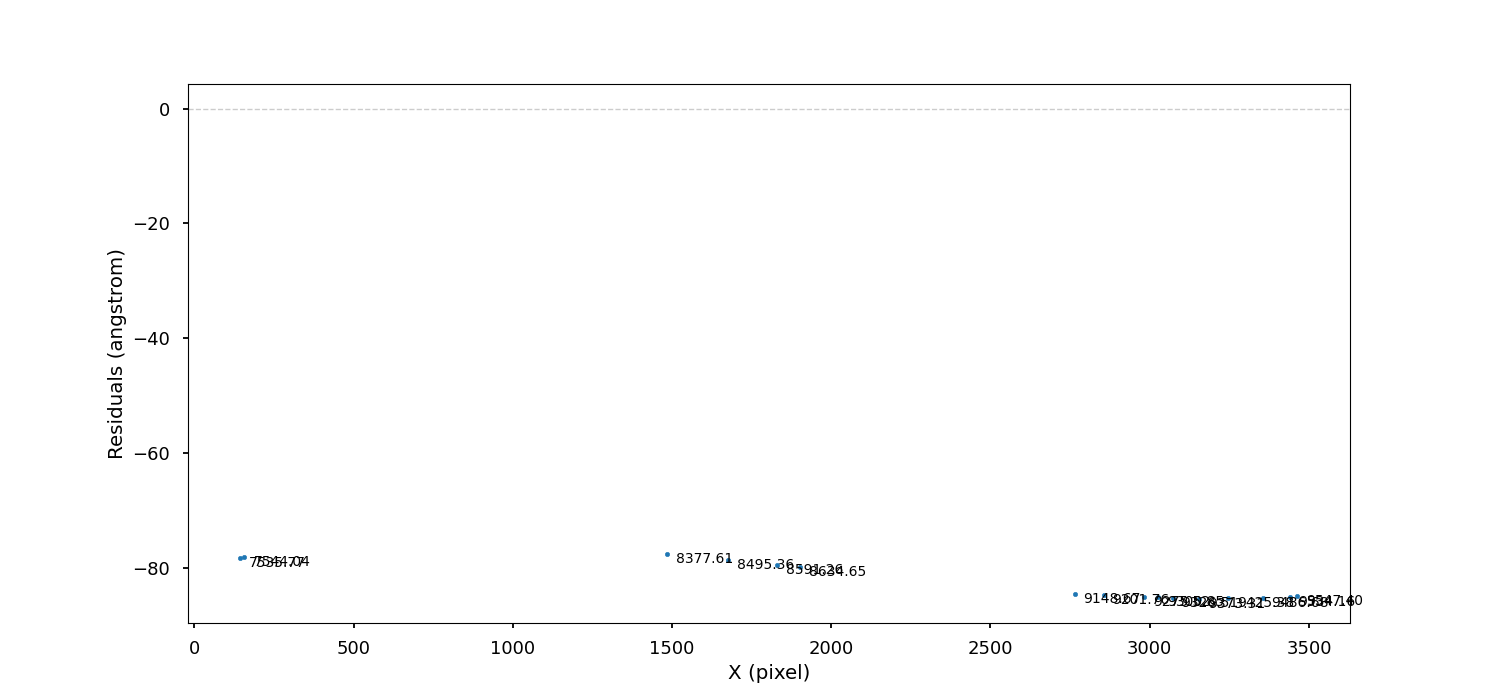

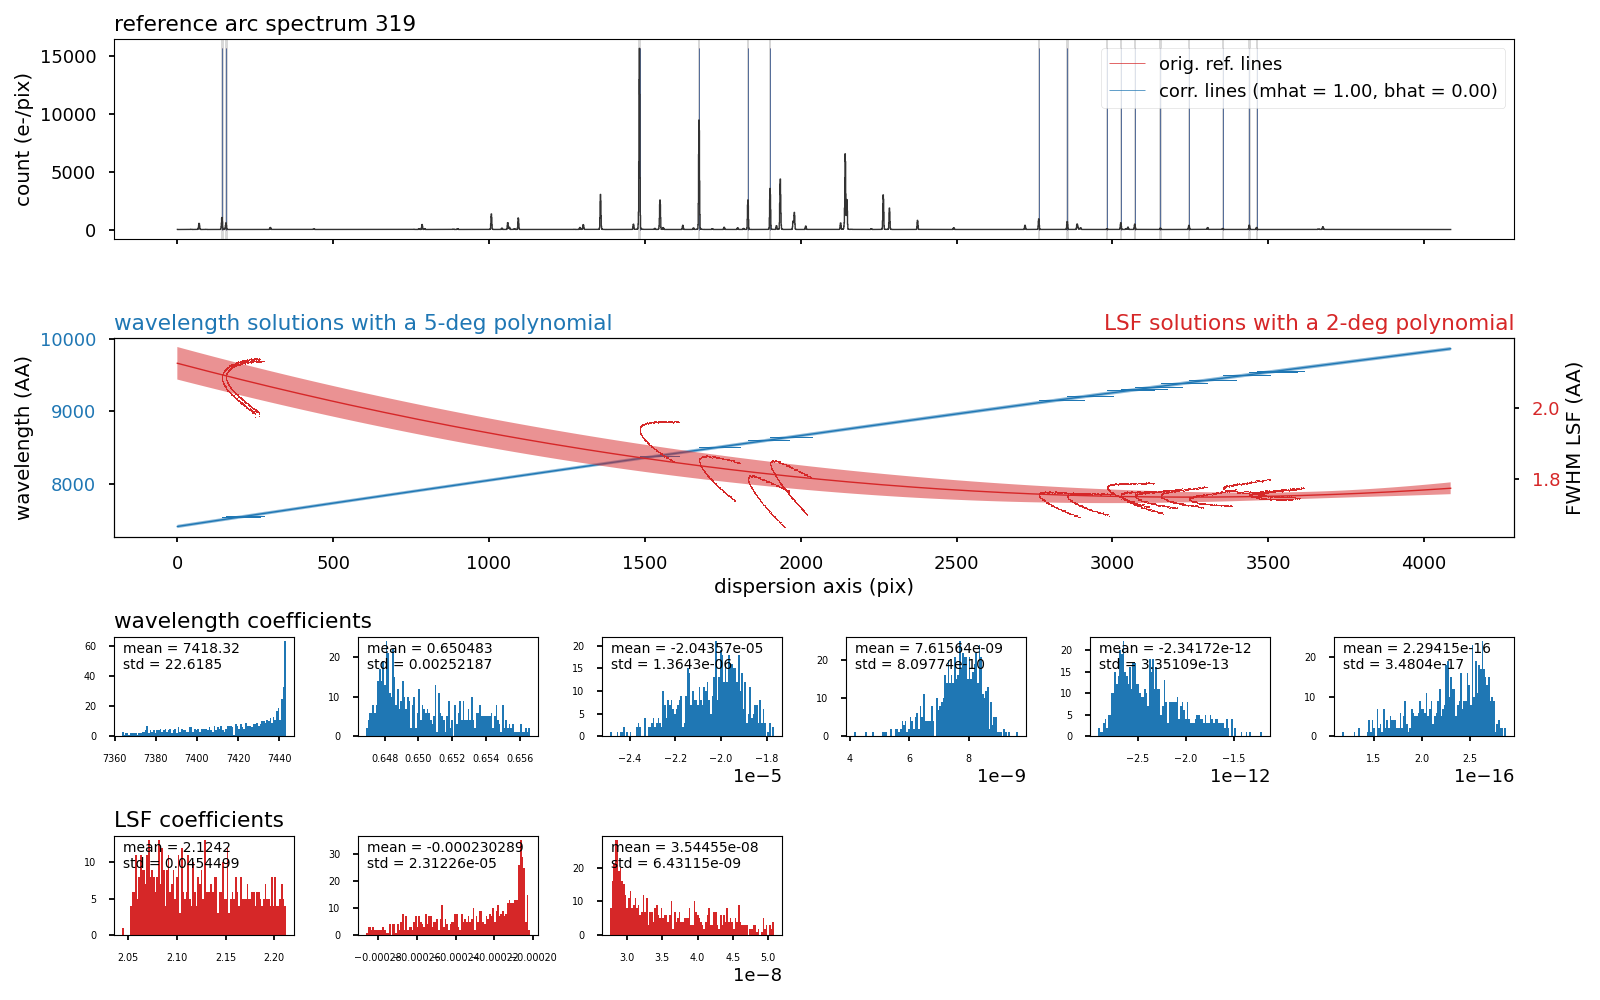

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mwave_neon-z3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60145/calib/lvm-mlsf_neon-z3.fits'


In [5]:
for _, marc in master_arcs.query("neon").iterrows():
    lamp = marc[lamps].astype(int).idxmax(0)
    xpath = path.full("lvm_master", drpver=drpver, kind=f"xmarc_{lamp}", **marc.to_dict())
    mwave = path.full("lvm_master", drpver=drpver, kind=f"mwave_{lamp}", **marc.to_dict())
    mlsf = path.full("lvm_master", drpver=drpver, kind=f"mlsf_{lamp}", **marc.to_dict())

    # if os.path.isfile(mwave):
    #     log.info(f"skipping {mwave} and {mlsf}, file already exist")
    #     continue
    
    rssMethod.determine_wavelength_solution(in_arcs=xpath, out_wave=mwave, out_lsf=mlsf, ref_fiber=319, aperture=10, cc_correction=False,
                                            poly_disp=5, poly_fwhm=2, poly_cros=2, flux_min=1e-12, fwhm_max=5, rel_flux_limits=[1e-12, 1e12], display_plots=True)
    # create pixel table
    # resample
    # combine channel
    # combine spectrograph
    # break

In [ ]:
fiberflats = get_masters_metadata(path_pattern=out_calib_path, mjd="super", kind="xfiberflat", exptime="x").sort_values("camera")

for _, fiberflat in fiberflats.iterrows():
    print(fiberflat)
    
    rssMethod.createPixTable_drp(
        in_rss=fiberflat.path,
        out_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="wfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        arc_wave=out_arc_path.format(mjd=fiberflat.mjd, kind="wave", camera=fiberflat.camera, lamps=LAMPS),
        arc_fwhm=out_arc_path.format(mjd=fiberflat.mjd, kind="lsf", camera=fiberflat.camera, lamps=LAMPS)
    )

    wave_range = CHANNEL_WL[fiberflat.camera[0]]
    rssMethod.resampleWave_drp(
        in_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="wfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        out_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="hfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )

In [ ]:
arcs = get_masters_metadata(path_pattern=out_arc_path, mjd="super", kind="xarc", lamps=LAMPS).sort_values("camera")

for _, arc in arcs.iterrows():
    print(arc)
    
    rssMethod.createPixTable_drp(
        in_rss=arc.path,
        out_rss=out_arc_path.format(mjd=arc.mjd, kind="warc", camera=arc.camera, lamps=LAMPS),
        arc_wave=out_arc_path.format(mjd=arc.mjd, kind="wave", camera=arc.camera, lamps=LAMPS),
        arc_fwhm=out_arc_path.format(mjd=arc.mjd, kind="lsf", camera=arc.camera, lamps=LAMPS)
    )

    wave_range = CHANNEL_WL[arc.camera[0]]
    rssMethod.resampleWave_drp(
        in_rss=out_arc_path.format(mjd=arc.mjd, kind="warc", camera=arc.camera, lamps=LAMPS),
        out_rss=out_arc_path.format(mjd=arc.mjd, kind="harc", camera=arc.camera, lamps=LAMPS),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )